In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Date submissions were extracted: 14 Oct. 2023 ( year to date )

Date comments were extraced: 21 Oct 2023 ( for the submissions above )

# Submission dataset

In [2]:
submissions = pd.read_csv('data/aba_asd_reddit_submissions.csv')

In [3]:
# missing data:

# author 10999 non-null 
# this column is not relevant for the analysis thus it will be dropped
# only extracted for reference purposes

# author_flair_text  1253 non-null
# means that 1253 submissions are flaired / have labels for the authors
# this helps identify the role or affiliation the author in a particular subreddit or is providing a label for their credentials ( ex: a prarent, an expert , the moderator etc. )
# this is not a relevant factor for the text classification task so it will not be included in the training of the model
# however the rows that have non-null entries for this factor will be investigated further to gain insights about the data
# ( for exmple: can we used the data to find out who makes negative or positive remarks about ABA? )

# distinguished  20 non-null 
# means the content is being made by an authoritative figure within the subreddit
# very few sumbissions have this - thus this variable will be dropped

# link_flair_text 5684 non-null
# means 5684 have a label category
# link_flair_text helps identify the type or category of a submission
# this factor will not be used in the final modeling
# we can however use to to invetigate and gain insights into the data: how does Reddit classify the entries that have labels?

# selftext 8450 non-null 
# means that only 8450 submission are text only ( the others are links or other formats )
# documentation: https://praw.readthedocs.io/en/stable/code_overview/models/submission.html

# url 10993 non-null
# this represents the link to the subbmission on the Reddit website
# extracted for reference purpose 
# will be dropped from the dataset as it will not be included in the analysis

submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             10999 non-null  object 
 1   author_flair_text  1253 non-null   object 
 2   title              11000 non-null  object 
 3   score              11000 non-null  int64  
 4   comments           11000 non-null  object 
 5   date               11000 non-null  float64
 6   distinguished      20 non-null     object 
 7   id                 11000 non-null  object 
 8   is_self            11000 non-null  bool   
 9   link_flair_text    5684 non-null   object 
 10  name               11000 non-null  object 
 11  num_comments       11000 non-null  int64  
 12  selftext           8450 non-null   object 
 13  subreddit          11000 non-null  object 
 14  upvote_ratio       11000 non-null  float64
 15  url                10993 non-null  object 
dtypes: bool(1), float64(2)

In [4]:
submissions.head(3)

,author,author_flair_text,title,score,comments,date,distinguished,id,is_self,link_flair_text,name,num_comments,selftext,subreddit,upvote_ratio,url
0,Oprymea,NaN,Behavior issues or early signs of autism?,0,<praw.models.comment_forest.CommentForest obje...,1.683630e+09,NaN,13cma8e,True,Toddler 1-3 Years,t3_13cma8e,9,My story starts in March 2022 when my then 1 y...,Parenting,0.25,https://www.reddit.com/r/Parenting/comments/13...
1,greenflights,Canterbury,[Suella Braverman MP] I condemn the appalling ...,84,<praw.models.comment_forest.CommentForest obje...,1.676147e+09,NaN,10zwt6z,False,Twitter,t3_10zwt6z,234,NaN,ukpolitics,0.77,https://twitter.com/SuellaBraverman/status/162...
2,PCGamerjunkie,NaN,i need answers,3,<praw.models.comment_forest.CommentForest obje...,1.687135e+09,NaN,14czqqe,True,Discussion,t3_14czqqe,15,so i am autistic on the spectrum i got diagnos...,Schizoid,0.80,https://www.reddit.com/r/Schizoid/comments/14c...


In [5]:
# filter rows with missing values
# 10987 rows with missing values
rows_with_missing_values = submissions[submissions.isnull().any(axis=1)]
rows_with_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10987 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author             10986 non-null  object 
 1   author_flair_text  1240 non-null   object 
 2   title              10987 non-null  object 
 3   score              10987 non-null  int64  
 4   comments           10987 non-null  object 
 5   date               10987 non-null  float64
 6   distinguished      7 non-null      object 
 7   id                 10987 non-null  object 
 8   is_self            10987 non-null  bool   
 9   link_flair_text    5671 non-null   object 
 10  name               10987 non-null  object 
 11  num_comments       10987 non-null  int64  
 12  selftext           8437 non-null   object 
 13  subreddit          10987 non-null  object 
 14  upvote_ratio       10987 non-null  float64
 15  url                10980 non-null  object 
dtypes: bool(1), float64(2), int

In [6]:
# selftext refers to the submission that have a text body
# if this is null the submission are probably empty, or links to other websites
# these submissions will be dropped form the analysis 
# the submission comments will be analysed further and those that are text based will be kept for the analysis
submissions[submissions[['selftext']].isnull().any(axis=1)].head(3)


,author,author_flair_text,title,score,comments,date,distinguished,id,is_self,link_flair_text,name,num_comments,selftext,subreddit,upvote_ratio,url
1,greenflights,Canterbury,[Suella Braverman MP] I condemn the appalling ...,84,<praw.models.comment_forest.CommentForest obje...,1.676147e+09,NaN,10zwt6z,False,Twitter,t3_10zwt6z,234,NaN,ukpolitics,0.77,https://twitter.com/SuellaBraverman/status/162...
6,Tripolie,NaN,Spectre of conversion therapy feared at summer...,679,<praw.models.comment_forest.CommentForest obje...,1.685358e+09,NaN,13urkjd,False,NB,t3_13urkjd,65,NaN,onguardforthee,0.98,https://www.cbc.ca/news/canada/new-brunswick/c...
9,Ashatistic,NaN,ONTAutism is the Autism Speaks of Canada. They...,32,<praw.models.comment_forest.CommentForest obje...,1.672559e+09,NaN,100ennm,False,NaN,t3_100ennm,4,NaN,AutismTranslated,0.91,https://twitter.com/OntAutism/status/160901888...


In [7]:
# drop irrelevant columns
columns_to_drop = ['author', 'author_flair_text', 'distinguished', 'link_flair_text', 'url']
submissions_cleaned = submissions.drop(columns=columns_to_drop)

# drop rows that have no text body
# resulting dataset has 8450 rows and 10 columns (a further selection is needed)
# no missing values 
submissions_cleaned.dropna(subset=['selftext'], inplace=True)
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8450 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         8450 non-null   object 
 1   score         8450 non-null   int64  
 2   comments      8450 non-null   object 
 3   date          8450 non-null   float64
 4   id            8450 non-null   object 
 5   is_self       8450 non-null   bool   
 6   name          8450 non-null   object 
 7   num_comments  8450 non-null   int64  
 8   selftext      8450 non-null   object 
 9   subreddit     8450 non-null   object 
 10  upvote_ratio  8450 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 734.4+ KB


In [8]:
# create a separate dataset to include author and link flair_text 
type_of_author = submissions.dropna(subset=['author_flair_text'])
# drop everything except : title, score, comments, date, id, is_self, num_comments, selftext, subreddit, upvote_ratio
cols_to_keep = ['author_flair_text', 'title', 'score', 'comments', 'date', 'id', 'is_self', 'num_comments', 'selftext', 'subreddit', 'upvote_ratio']
type_of_author = type_of_author[cols_to_keep]
type_of_author.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1253 entries, 1 to 10991
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author_flair_text  1253 non-null   object 
 1   title              1253 non-null   object 
 2   score              1253 non-null   int64  
 3   comments           1253 non-null   object 
 4   date               1253 non-null   float64
 5   id                 1253 non-null   object 
 6   is_self            1253 non-null   bool   
 7   num_comments       1253 non-null   int64  
 8   selftext           816 non-null    object 
 9   subreddit          1253 non-null   object 
 10  upvote_ratio       1253 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 108.9+ KB


In [9]:
authors = type_of_author.author_flair_text.value_counts()
# there are 869 lables /types of authors 
print('Number of categories:', len(authors))
authors


Number of categories: 869


author_flair_text
Autistic Adult             20
Autistic and ADHD          18
Autistic                   15
BCBA                       12
Autistic                   12
                           ..
4.5 Too much Buccal Fat     1
Autism + traADHD            1
Social Democracy            1
🦅 USA                       1
:Japan:                     1
Name: count, Length: 869, dtype: int64

Number of categories with more than 2 entries: 68


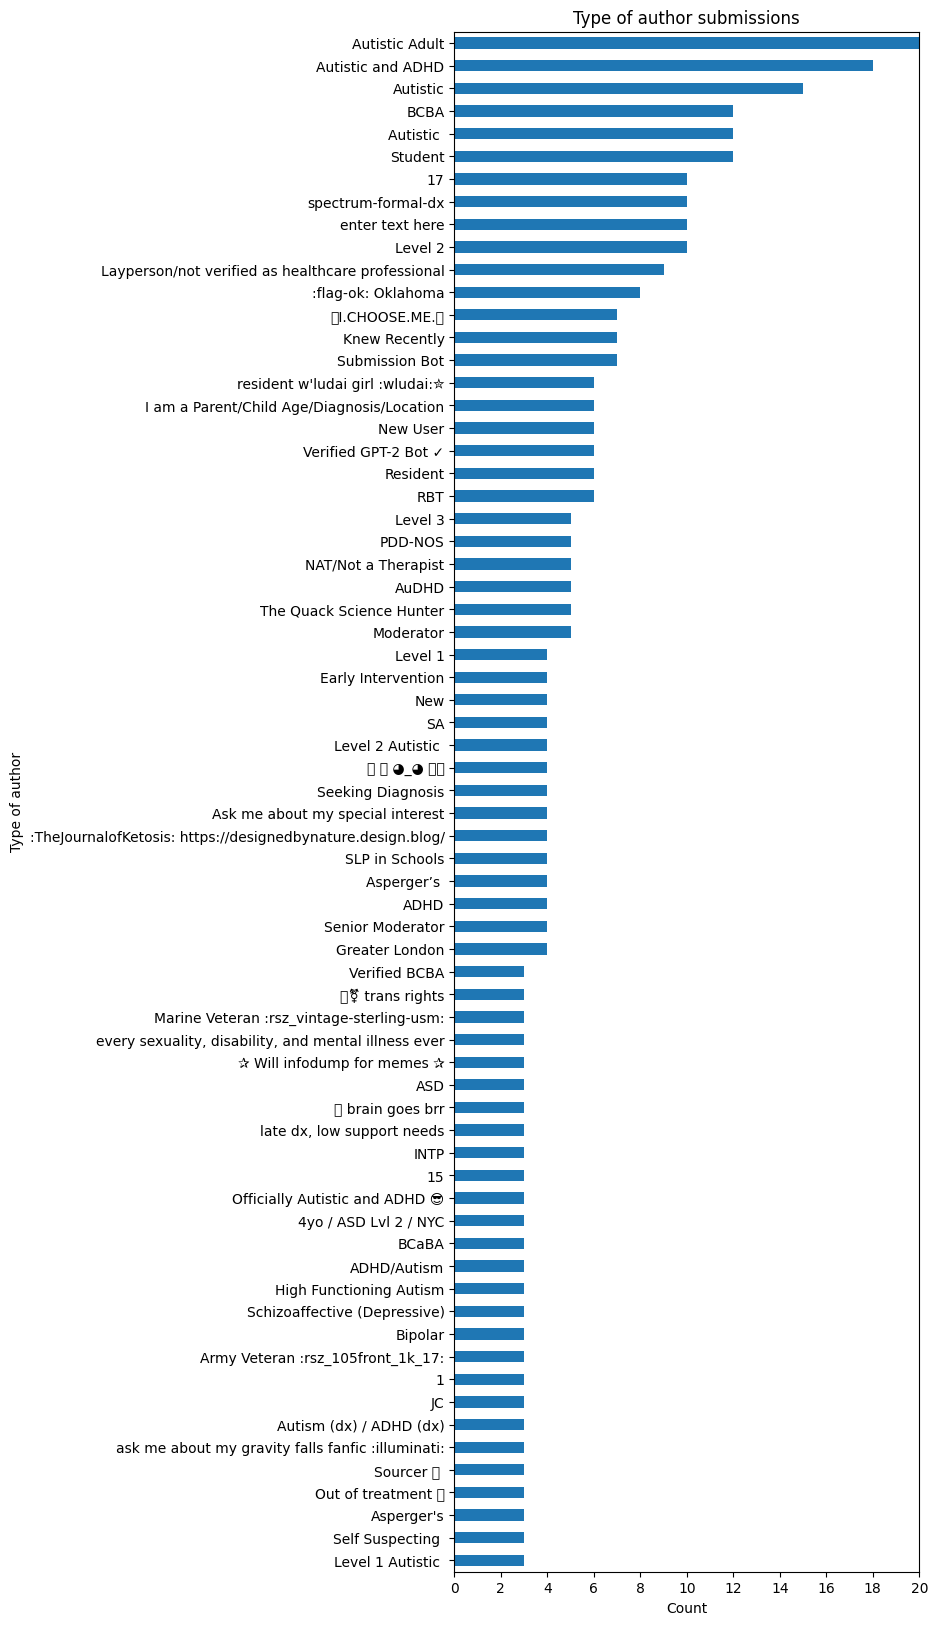

In [10]:
# ignore warnings related to incompatible fonts 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# filter for categories with more than 2 entries
filtered_authors = authors[authors > 2]
print('Number of categories with more than 2 entries:', len(filtered_authors))


# plot the authors type only for the categories with more than 2 entries
plt.figure(figsize=(6, 20))
filtered_authors.plot(kind='barh').set_xlim(0, 20)

plt.xlabel('Count')
plt.ylabel('Type of author')
plt.title('Type of author submissions')
plt.gca().invert_yaxis()
plt.xticks(range(0, filtered_authors.max() + 1, 2))
plt.show()

# most labels are not very informative (for ex: 17, knew recently, New , SA [...] )
# however we notice some usefull labels for author types:
# for example: 'autistic' 'BCBA' , 'Layperson/notverified [...]' 'ASD', 'I am a parent[...]'
# there is little data to create a viable dataset for sentiment analysis??
# use the labels to create search words to match the actual submissions? 
# for ex 'I am a parent...' is found in the text of the submission most likly comes from a parent 

# could also use the lables for supervised text classification fine tuning?? 
# train a model to classify these texts corectly and then extend it to the whole dataset? - some models can do this with as little as 100 examples

In [11]:
# create a separate dataset to include link flair_text 
type_of_link = submissions.dropna(subset=['link_flair_text'])
# drop everything except : title, score, comments, date, id, is_self, num_comments, selftext, subreddit, upvote_ratio
cols_to_keep = ['author_flair_text', 'title', 'score', 'comments', 'date', 'id', 'link_flair_text', 'is_self', 'num_comments', 'selftext', 'subreddit', 'upvote_ratio']
type_of_link = type_of_link[cols_to_keep]
type_of_link.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5684 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author_flair_text  931 non-null    object 
 1   title              5684 non-null   object 
 2   score              5684 non-null   int64  
 3   comments           5684 non-null   object 
 4   date               5684 non-null   float64
 5   id                 5684 non-null   object 
 6   link_flair_text    5684 non-null   object 
 7   is_self            5684 non-null   bool   
 8   num_comments       5684 non-null   int64  
 9   selftext           4578 non-null   object 
 10  subreddit          5684 non-null   object 
 11  upvote_ratio       5684 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 538.4+ KB


In [12]:
links = type_of_link.link_flair_text.value_counts()
# there are 1458 lables /types of links 
print('Number of categories:', len(links))
links

Number of categories: 1458


link_flair_text
Discussion          503
Question            463
Advice Needed       344
Advice              268
Rant/Vent           121
                   ... 
Introduction          1
Gaming                1
Fight Freakout 👊      1
Music                 1
*Renji Sanada         1
Name: count, Length: 1458, dtype: int64

Number of categories with more than 10 entries: 64


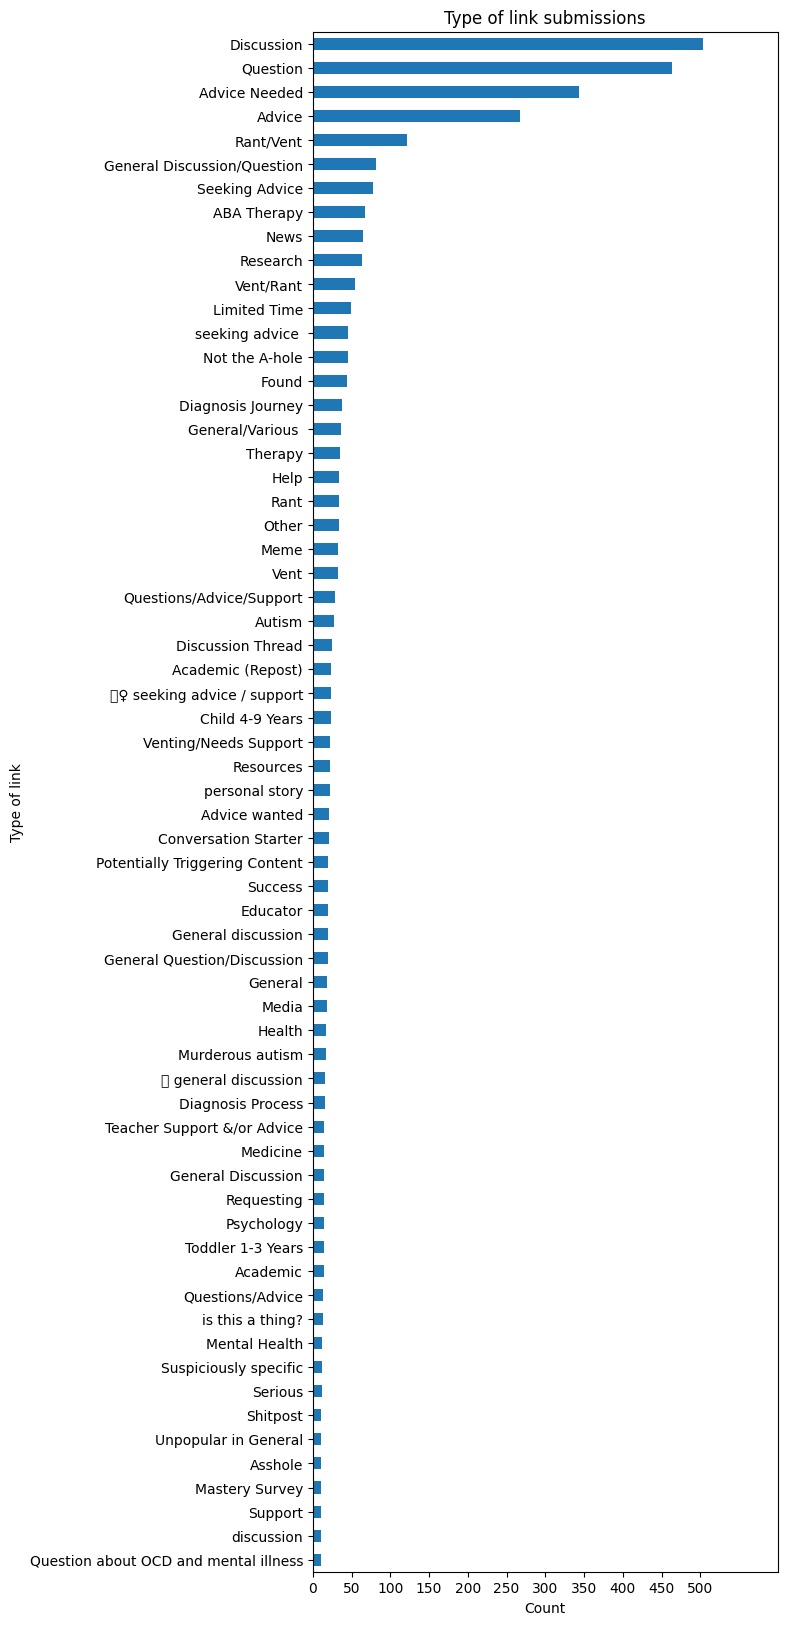

In [13]:
# ignore warnings related to incompatible fonts 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# filter for categories with more than 10 entries
filtered_links = links[links > 10]
print('Number of categories with more than 10 entries:', len(filtered_links))


# plot the links type only for the categories with more than 10 entries
plt.figure(figsize=(6, 20))
filtered_links.plot(kind='barh').set_xlim(0, 600)

plt.xlabel('Count')
plt.ylabel('Type of link')
plt.title('Type of link submissions')
plt.gca().invert_yaxis()
plt.xticks(range(0, filtered_links.max() + 1, 50))
plt.show()

# there is more data for submissions labels 
# most of them seem to be discussions and advice 
# maybe use these for supervise learning ? not sure if this is usefull 
# could help interpret a bertTopic analysis later?

In [14]:
# back to the main dataset
# 8450 entries , no missing values
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8450 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         8450 non-null   object 
 1   score         8450 non-null   int64  
 2   comments      8450 non-null   object 
 3   date          8450 non-null   float64
 4   id            8450 non-null   object 
 5   is_self       8450 non-null   bool   
 6   name          8450 non-null   object 
 7   num_comments  8450 non-null   int64  
 8   selftext      8450 non-null   object 
 9   subreddit     8450 non-null   object 
 10  upvote_ratio  8450 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 734.4+ KB


In [15]:
# is_self tells us whether or not the submission is a selfpost (text-only)
# if it is False it means the body of the body og the submission is a link to an external site , not actual discussion text
# documentation: https://praw.readthedocs.io/en/stable/code_overview/models/submission.html
no_is_self = submissions_cleaned[submissions_cleaned['is_self'] == False]
print('self_text is False / submission\'s text is a link: ', len(no_is_self))
no_is_self.head()

self_text is False / submission's text is a link:  623


,title,score,comments,date,id,is_self,name,num_comments,selftext,subreddit,upvote_ratio
45,Is this diagnosis/experience from a child neur...,8,<praw.models.comment_forest.CommentForest obje...,1.690843e+09,15eufrn,False,t3_15eufrn,37,Just took my 6 year old son to a Child & Adole...,Autism_Parenting,0.79
79,Happy New Year from ABA Resource Center!,5,<praw.models.comment_forest.CommentForest obje...,1.672504e+09,zzxk9o,False,t3_zzxk9o,0,Wishing you all a Happy New Year! \nMay 2023 b...,BehaviorAnalysis,0.78
90,📢 Ascension Healthcare is hiring a Behavioral ...,1,<praw.models.comment_forest.CommentForest obje...,1.678226e+09,11lch3y,False,t3_11lch3y,0,\r\n\r\n\r\n Apply → https://jobboardsearch.co...,jobboardsearch,1.00
118,📢 InBloom Autism Services is hiring a Behavior...,1,<praw.models.comment_forest.CommentForest obje...,1.675689e+09,10v6d7h,False,t3_10v6d7h,0,\r\n\r\n\r\n Apply → https://jobboardsearch.co...,jobboardsearch,1.00
127,"Existentialism, Humanism, Acceptance and Commi...",1,<praw.models.comment_forest.CommentForest obje...,1.697166e+09,176p0fo,False,t3_176p0fo,0,How do we accept* what we are? Well first you ...,TherapyTools,1.00


In [16]:
# drop the rows for which is_self=False ( no text to analyse )
# the data set now contains 7827 rows and 10 cloumns
submissions_cleaned = submissions_cleaned[submissions_cleaned['is_self']]
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7827 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         7827 non-null   object 
 1   score         7827 non-null   int64  
 2   comments      7827 non-null   object 
 3   date          7827 non-null   float64
 4   id            7827 non-null   object 
 5   is_self       7827 non-null   bool   
 6   name          7827 non-null   object 
 7   num_comments  7827 non-null   int64  
 8   selftext      7827 non-null   object 
 9   subreddit     7827 non-null   object 
 10  upvote_ratio  7827 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 680.3+ KB


In [17]:
# which subreddit do the submissions come from?
suberddits = submissions_cleaned.subreddit.value_counts()
print('Number of subreddits: ', len(suberddits))
suberddits

Number of subreddits:  1809


subreddit
autism              842
ABA                 466
Autism_Parenting    419
aspergers           386
AutismInWomen       325
                   ... 
visualsnow            1
UCSantaBarbara        1
BurlingtonON          1
PokemonRoleplays      1
montreal              1
Name: count, Length: 1809, dtype: int64

In [18]:
# turn subreddits data into a pandas dataframe
suberddits = pd.DataFrame(suberddits)
suberddits

,count
subreddit,
autism,842
ABA,466
Autism_Parenting,419
aspergers,386
AutismInWomen,325
...,...
visualsnow,1
UCSantaBarbara,1
BurlingtonON,1


<Figure size 600x800 with 0 Axes>

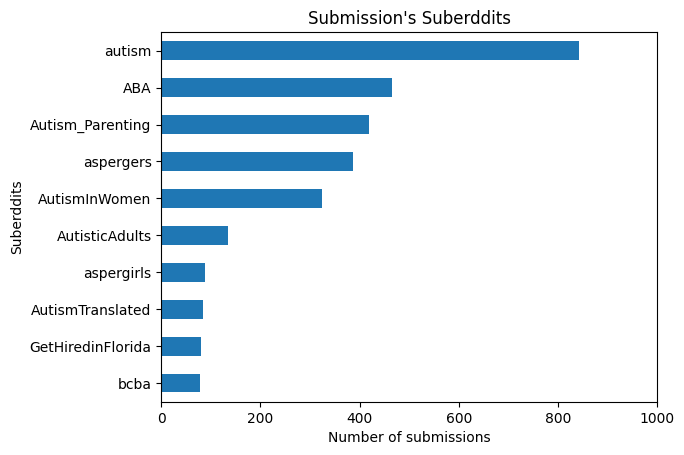

In [19]:
# Sort in descending order and select the top 10 suberddits
filtered_suberddits = suberddits.sort_values(by='count', ascending=False).head(10)

# plot the top suberddits ( where the submissions came from/ that provided the most submissions )
plt.figure(figsize=(6, 8))
ax = filtered_suberddits.plot(kind='barh')
ax.set_xlim(0, 1000)
ax.get_legend().remove()

plt.xlabel('Number of submissions')
plt.ylabel('Suberddits')
plt.title('Submission\'s Suberddits')

# show highest count at the top
plt.gca().invert_yaxis()
plt.show()



# almost half of the submissions come from the 10 Reddit communities below
# a quarter coming form the r/autism, r/ABA, r/Autism_Parenting, r/aspergers and r/AutismInWomen

In [20]:
# what are the most popular submissions?
# score is a numerical value that reflects the overall popularity and engagement of a Reddit post
# combines both upvotes and downvotes from the Reddit community

# Sort in descending order and select the top 10 submissions
top_subbmisstions = submissions_cleaned.sort_values(by='score', ascending=False).head(10)
top_subbmisstions[['title', 'score', 'date', 'num_comments', 'selftext', 'subreddit', 'upvote_ratio']]

# the top submissions do not seem to be related to ASD and ABA
# the dataset needs to be filtered forward to select more relevant submissions to ABA and ASD - topic analysis?
# in this topic analysis all summissions and their comments will be included - in order to try and select all the posts about ABA and ASD (if this will be among topics)

,title,score,date,num_comments,selftext,subreddit,upvote_ratio
9589,"ESPN, if you’re reading this: please, we’re be...",28257,1.684849e+09,2227,After watching ESPN’s coverage of the Western ...,nba,0.92
4606,OP Accidentally Trained Her Cat To Be An Eatin...,21474,1.669407e+09,579,Originally posted by u/moonchild_86 in r/TrueO...,BestofRedditorUpdates,0.96
2379,My 19 yo sister is getting married to her high...,19482,1.683454e+09,1131,**I am not the OP. That is u/Throw-Away-Acnt_m...,BestofRedditorUpdates,0.95
6678,YSK you’re not expected to actually spend your...,16369,1.692595e+09,1475,This applies mostly to office jobs.\n\nIt’s mu...,YouShouldKnow,0.84
2684,AITA for telling my brother it was a dumb deci...,13435,1.685380e+09,1987,My (20M) brother Ron (27M) met his late gf Lin...,AmItheAsshole,0.96
3032,"A ""Creepy"" friend of OOP's girlfriend asks OOP...",13299,1.685654e+09,813,**I am NOT OP. Original post by u/ThrowRAJeffT...,BestofRedditorUpdates,0.99
10775,The most impressive thing about this game is l...,13160,1.695366e+09,1954,What I mean by that is we've all gotten used t...,BaldursGate3,0.96
5763,"Being whatever gender is ok but, don't you hav...",12698,1.672070e+09,2882,For example if someone is saying they identify...,NoStupidQuestions,0.86
1972,High school reunions are nonsense.,12626,1.691167e+09,1896,Today I received a whatsapp notification that ...,unpopularopinion,0.84
10799,YSK: Getting married does not cure a person of...,10530,1.671382e+09,203,Why YSK: If you are in a relationship with a ...,YouShouldKnow,0.94


In [21]:
# turn date column values from float to datetime object - easier to visualise and work with
from datetime import datetime

datetime.utcfromtimestamp(submissions_cleaned.date[0])

datetime.datetime(2023, 5, 9, 10, 59, 15)

In [22]:
submissions_cleaned.date.head(2)

0    1.683630e+09
2    1.687135e+09
Name: date, dtype: float64

In [23]:
submissions_cleaned['datetime'] = submissions_cleaned.date.apply(datetime.utcfromtimestamp)
submissions_cleaned.datetime.head(2)

0   2023-05-09 10:59:15
2   2023-06-19 00:30:42
Name: datetime, dtype: datetime64[ns]

In [24]:
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7827 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7827 non-null   object        
 1   score         7827 non-null   int64         
 2   comments      7827 non-null   object        
 3   date          7827 non-null   float64       
 4   id            7827 non-null   object        
 5   is_self       7827 non-null   bool          
 6   name          7827 non-null   object        
 7   num_comments  7827 non-null   int64         
 8   selftext      7827 non-null   object        
 9   subreddit     7827 non-null   object        
 10  upvote_ratio  7827 non-null   float64       
 11  datetime      7827 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 999.5+ KB


In [25]:
# we wont need the 'date' column anymore -> drop it
submissions_cleaned.drop('date', axis=1, inplace=True)
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7827 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7827 non-null   object        
 1   score         7827 non-null   int64         
 2   comments      7827 non-null   object        
 3   id            7827 non-null   object        
 4   is_self       7827 non-null   bool          
 5   name          7827 non-null   object        
 6   num_comments  7827 non-null   int64         
 7   selftext      7827 non-null   object        
 8   subreddit     7827 non-null   object        
 9   upvote_ratio  7827 non-null   float64       
 10  datetime      7827 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 938.3+ KB


In [26]:
# descriptive statistics for numerical values
submissions_cleaned.describe()

# the score factror is very skewed to the left: 3 quartes of the submissions have a score lower than 30
# the num_commnets is skewed to the left too: 3 quartes of the submissions have less than 30 comments , meaning the vaast majority of the comments come from the few top submissions


,score,num_comments,upvote_ratio,datetime
count,7827.000000,7827.000000,7827.000000,7827
mean,147.077424,49.372045,0.856714,2023-05-20 09:08:58.954771968
min,0.000000,0.000000,0.080000,2022-10-13 05:14:14
25%,2.000000,3.000000,0.780000,2023-03-02 13:32:00
50%,6.000000,9.000000,0.920000,2023-06-03 14:50:25
75%,27.000000,29.000000,1.000000,2023-08-18 20:58:22
max,28257.000000,7649.000000,1.000000,2023-10-13 10:50:16
std,861.140387,228.188044,0.174322,NaN


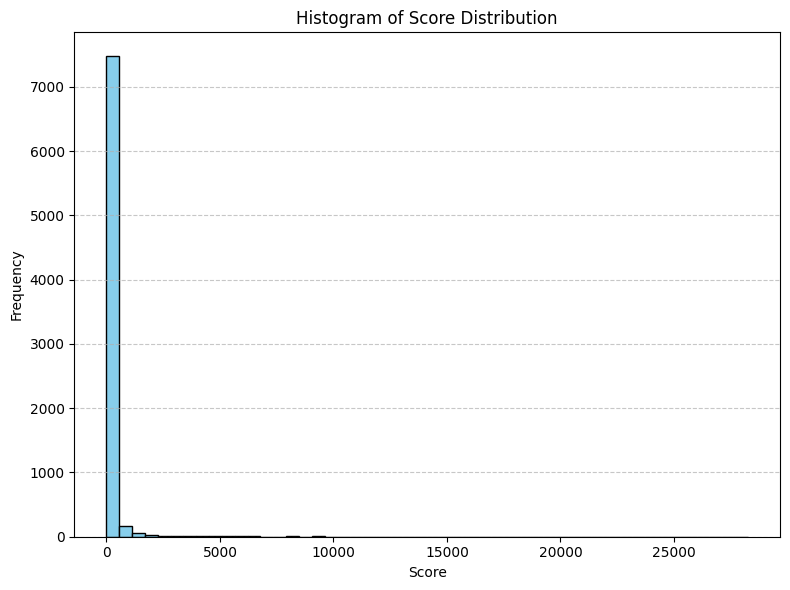

In [27]:
# create a histogram of the 'score' distribution
score_sorted = submissions_cleaned.sort_values(by='score')

plt.figure(figsize=(8, 6))
plt.hist(score_sorted['score'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Score Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [28]:
# inspect the outliers (the top 25%)
# filter rows where 'score' is greater than 27
top_scores = submissions_cleaned[submissions_cleaned['score'] > 27]
top_scores.info()

# 1950 submissions have over 27 score 

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 4 to 10975
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1950 non-null   object        
 1   score         1950 non-null   int64         
 2   comments      1950 non-null   object        
 3   id            1950 non-null   object        
 4   is_self       1950 non-null   bool          
 5   name          1950 non-null   object        
 6   num_comments  1950 non-null   int64         
 7   selftext      1950 non-null   object        
 8   subreddit     1950 non-null   object        
 9   upvote_ratio  1950 non-null   float64       
 10  datetime      1950 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 169.5+ KB


In [29]:
top_scores.describe()

,score,num_comments,upvote_ratio,datetime
count,1950.000000,1950.000000,1950.000000,1950
mean,573.678462,163.506154,0.930938,2023-05-14 07:40:50.596923136
min,28.000000,0.000000,0.540000,2022-10-13 21:59:15
25%,54.000000,30.250000,0.910000,2023-02-21 12:18:35.500000
50%,124.000000,67.000000,0.950000,2023-05-28 10:50:50
75%,372.750000,149.000000,0.980000,2023-08-15 10:53:27.750000128
max,28257.000000,7649.000000,1.000000,2023-10-12 16:01:08
std,1653.799737,434.584108,0.064711,NaN


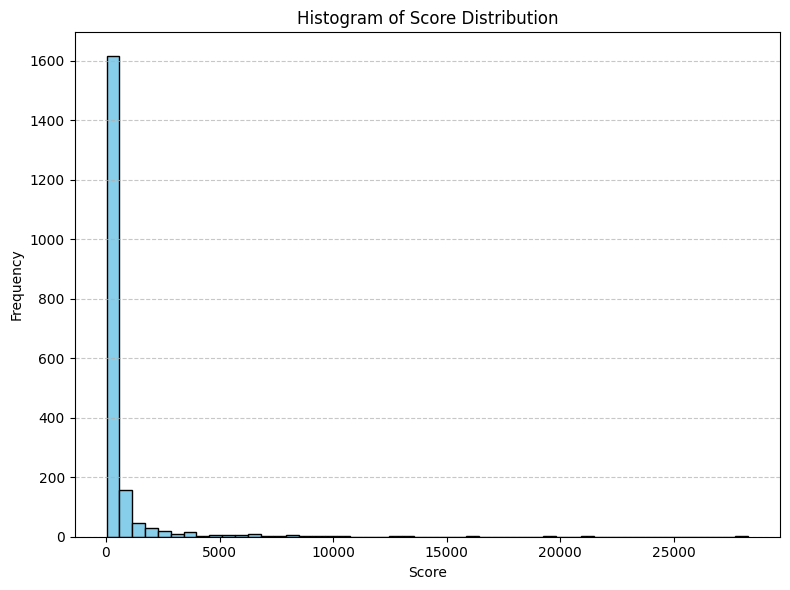

In [30]:
# create a histogram of the top 'score' distribution
top_scores_sorted = top_scores.sort_values(by='score')

plt.figure(figsize=(8, 6))
plt.hist(top_scores_sorted['score'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Score Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
# we still notice the distribution is left skewed 
# inspect the outliers (the top 25% of the top 25%)
# filter rows where 'score' is greater than 373
top_scores = submissions_cleaned[submissions_cleaned['score'] > 373]
top_scores.info()

# 487 have a higher score than 373

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 21 to 10975
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         487 non-null    object        
 1   score         487 non-null    int64         
 2   comments      487 non-null    object        
 3   id            487 non-null    object        
 4   is_self       487 non-null    bool          
 5   name          487 non-null    object        
 6   num_comments  487 non-null    int64         
 7   selftext      487 non-null    object        
 8   subreddit     487 non-null    object        
 9   upvote_ratio  487 non-null    float64       
 10  datetime      487 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 42.3+ KB


In [32]:
top_scores.describe()

,score,num_comments,upvote_ratio,datetime
count,487.000000,487.000000,487.000000,487
mean,1958.357290,445.061602,0.940021,2023-05-20 18:29:03.798768128
min,374.000000,1.000000,0.660000,2022-10-13 21:59:15
25%,544.500000,134.000000,0.920000,2023-03-08 19:49:42
50%,860.000000,237.000000,0.960000,2023-06-03 12:26:33
75%,1992.000000,440.000000,0.980000,2023-08-23 14:51:14
max,28257.000000,7649.000000,1.000000,2023-10-12 15:16:38
std,2895.745137,796.457437,0.056154,NaN


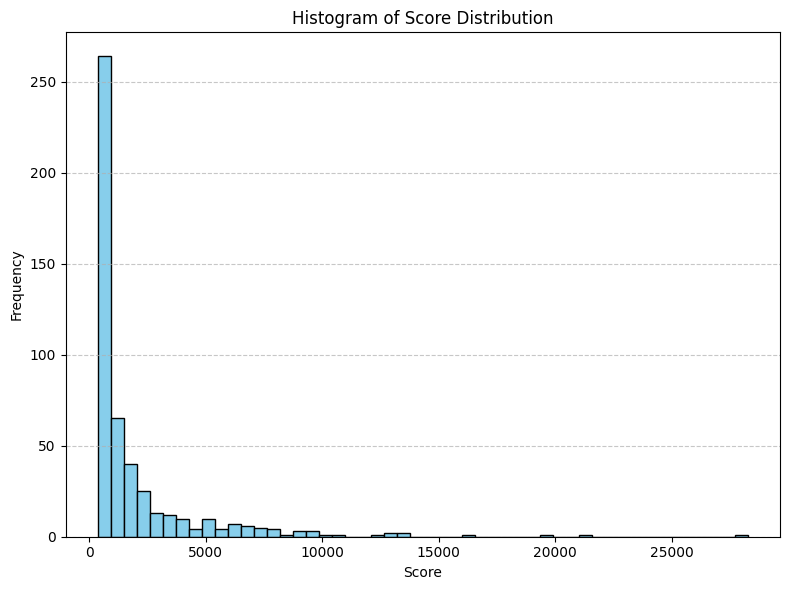

In [33]:
# create a histogram of the top 'score' distribution
top_scores_sorted = top_scores.sort_values(by='score')

plt.figure(figsize=(8, 6))
plt.hist(top_scores_sorted['score'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Score Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
# we still notice the distribution is left skewed 
# inspect the outliers (the top 25% of the top 25% of the top 25%)
# filter rows where 'score' is greater than 1992
top_scores = submissions_cleaned[submissions_cleaned['score'] > 1992]
top_scores.info()

# 122 have a higher score than 1992

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 223 to 10975
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         122 non-null    object        
 1   score         122 non-null    int64         
 2   comments      122 non-null    object        
 3   id            122 non-null    object        
 4   is_self       122 non-null    bool          
 5   name          122 non-null    object        
 6   num_comments  122 non-null    int64         
 7   selftext      122 non-null    object        
 8   subreddit     122 non-null    object        
 9   upvote_ratio  122 non-null    float64       
 10  datetime      122 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 10.6+ KB


In [35]:
top_scores.describe()

,score,num_comments,upvote_ratio,datetime
count,122.000000,122.000000,122.000000,122
mean,5433.696721,1020.270492,0.930902,2023-05-15 23:30:43.262295040
min,1998.000000,62.000000,0.660000,2022-10-13 21:59:15
25%,2743.000000,311.000000,0.920000,2023-02-23 03:16:13.500000
50%,3894.000000,571.500000,0.950000,2023-05-24 16:30:00
75%,6581.000000,1063.750000,0.970000,2023-08-29 00:00:33.249999872
max,28257.000000,7649.000000,1.000000,2023-10-11 09:18:45
std,4120.680532,1400.560425,0.059848,NaN


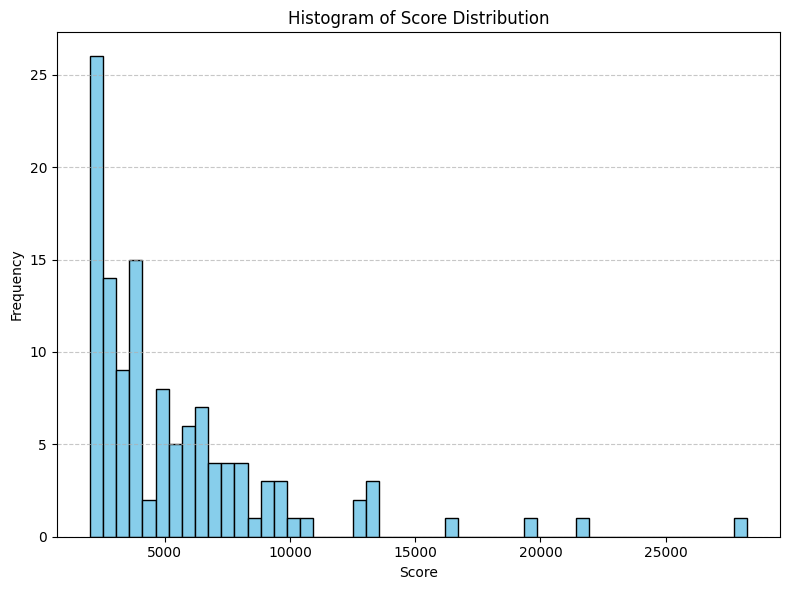

In [36]:
# create a histogram of the top 'score' distribution
top_scores_sorted = top_scores.sort_values(by='score')

plt.figure(figsize=(8, 6))
plt.hist(top_scores_sorted['score'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Score Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
# the distribution is still skewed but 122 is a small data set and we can check these manually
# if the submissions are not relevant to ASD and ABA they will be removed 
file_path = 'data/top_scores_submissions.csv'
top_scores[['id', 'title' , 'selftext']].to_csv(file_path, index=False)

In [38]:
# load the annotated dataset of top scodred submissions
top_scores_annotated = pd.read_csv('data/top_scores_submissions_annotated.csv')
top_scores_annotated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                122 non-null    object
 1   title             122 non-null    object
 2   selftext          122 non-null    object
 3   ASD_ABA_relevant  122 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [39]:
# 0 lable = submission was not cosidered relevant by the current author
top_scores_annotated.ASD_ABA_relevant.value_counts()

ASD_ABA_relevant
0          87
ASD        28
ABA         3
ABA ASD     2
Therapy     1
ASD ABA     1
Name: count, dtype: int64

# TODO

In [40]:
# remove all submissions which have lable 0 ?????

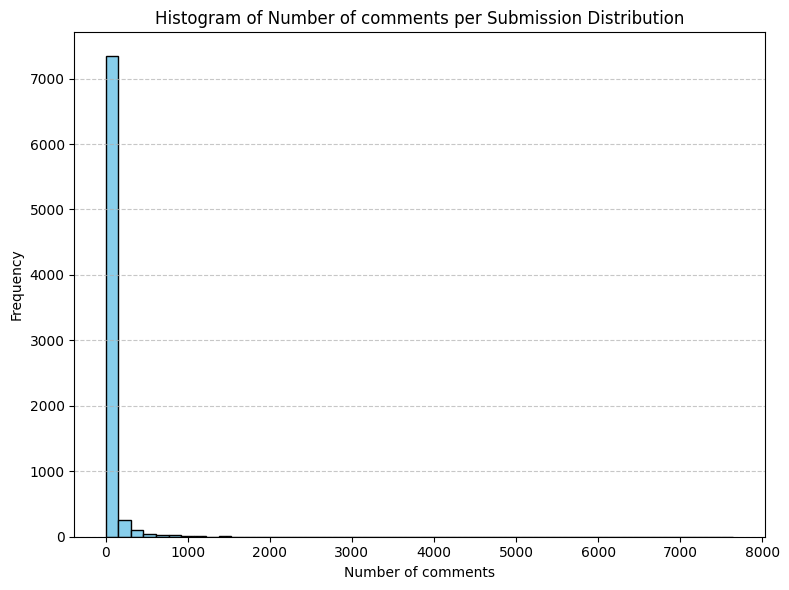

In [41]:
# create a histogram of the 'num_comments' distribution
num_comments_sorted = submissions_cleaned.sort_values(by='num_comments')

plt.figure(figsize=(8, 6))
plt.hist(num_comments_sorted['num_comments'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of comments')
plt.ylabel('Frequency')
plt.title('Histogram of Number of comments per Submission Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
# Extract the month and year, and create new columns 'month' and 'year'
submissions_cleaned['month'] = submissions_cleaned['datetime'].dt.month
submissions_cleaned['year'] = submissions_cleaned['datetime'].dt.year
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7827 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7827 non-null   object        
 1   score         7827 non-null   int64         
 2   comments      7827 non-null   object        
 3   id            7827 non-null   object        
 4   is_self       7827 non-null   bool          
 5   name          7827 non-null   object        
 6   num_comments  7827 non-null   int64         
 7   selftext      7827 non-null   object        
 8   subreddit     7827 non-null   object        
 9   upvote_ratio  7827 non-null   float64       
 10  datetime      7827 non-null   datetime64[ns]
 11  month         7827 non-null   int32         
 12  year          7827 non-null   int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 999.5+ KB


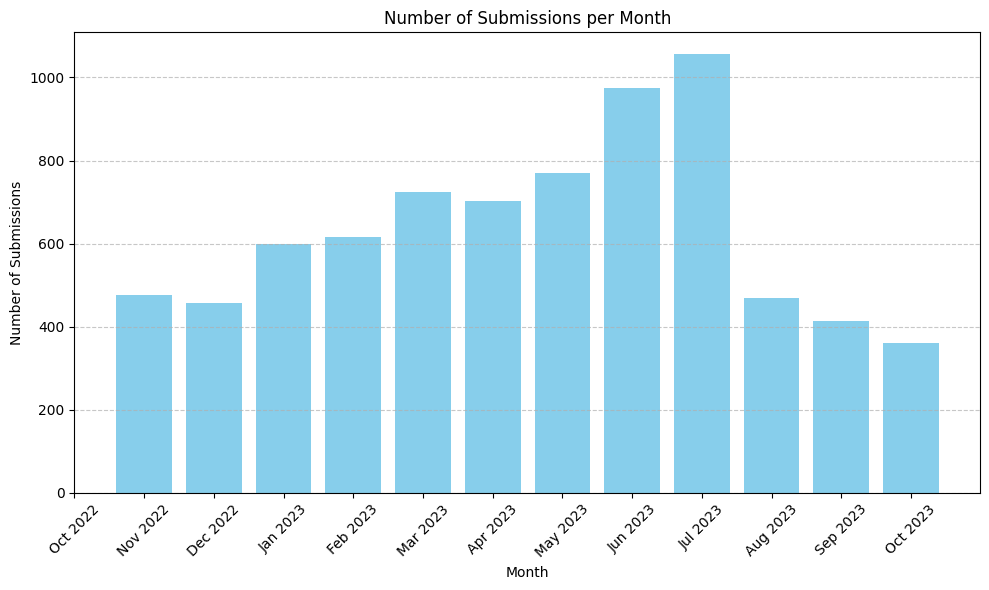

In [43]:
import calendar 

# sort data first by year (in ascending order) and then by month (in ascending order)
submissions_cleaned = submissions_cleaned.sort_values(['year', 'month'])
# group the data by 'year' and 'month' and count the number of 'id' values per month
counts = submissions_cleaned.groupby(['year', 'month'])['id'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts['month'], counts['id'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Submissions')
plt.title('Number of Submissions per Month')

# format the x-axis labels to display both month and year
x_labels = [f'{calendar.month_abbr[month]} {year}' for year, month in zip(counts['year'], counts['month'])]

# get the unique x_labels and their corresponding positions ( chronological order )
unique_x_labels = list(set(x_labels))
unique_x_positions = [x_labels.index(label) for label in unique_x_labels]

plt.xticks(unique_x_positions, unique_x_labels, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# most submission were made during sprong-summer months
# there is not special event during that time that would prompt an increas ( can be a normal variation in platform usage/posting )

In [44]:
# back to the clean whole submissions dataset
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7827 entries, 27 to 10951
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7827 non-null   object        
 1   score         7827 non-null   int64         
 2   comments      7827 non-null   object        
 3   id            7827 non-null   object        
 4   is_self       7827 non-null   bool          
 5   name          7827 non-null   object        
 6   num_comments  7827 non-null   int64         
 7   selftext      7827 non-null   object        
 8   subreddit     7827 non-null   object        
 9   upvote_ratio  7827 non-null   float64       
 10  datetime      7827 non-null   datetime64[ns]
 11  month         7827 non-null   int32         
 12  year          7827 non-null   int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 741.4+ KB


In [45]:
# descriptive statistics for non numerical factors
# we notice duplicate titles and texts 
submissions_cleaned.describe(include='object')

,title,comments,id,name,selftext,subreddit
count,7827,7827,7827,7827,7827,7827
unique,7404,7827,7827,7827,7560,1809
top,Recruiting Participants for a Survey Study on ...,<praw.models.comment_forest.CommentForest obje...,y3msw7,t3_y3msw7,Hello! We are recruiting participants for a st...,autism
freq,34,1,1,1,29,842


In [46]:
# select the non-unique rows 
# same posts appear to have been posted in different subredits 
# these will generate different comments - > duplicate titles will be dropped, but comments will be kept
non_unique_title_mask = submissions_cleaned['title'].duplicated(keep=False)
non_unique_title_rows = submissions_cleaned[non_unique_title_mask]
print(len(non_unique_title_rows))
non_unique_title_rows.head()

675


,title,score,comments,id,is_self,name,num_comments,selftext,subreddit,upvote_ratio,datetime,month,year
215,Survey Research: Client Assent in Behavior Ana...,12,<praw.models.comment_forest.CommentForest obje...,y3fhf3,True,t3_y3fhf3,1,The Behavior Analyst Certification Board *Ethi...,ABA,0.94,2022-10-14 00:54:09,10,2022
295,Survey Research: Client Assent in Behavior Ana...,11,<praw.models.comment_forest.CommentForest obje...,y3fimr,True,t3_y3fimr,0,The Behavior Analyst Certification Board *Ethi...,BehaviorAnalysis,0.93,2022-10-14 00:55:42,10,2022
1949,Cognitive Behavioral Therapy,39,<praw.models.comment_forest.CommentForest obje...,yfzhoy,True,t3_yfzhoy,49,Hi everyone! I was recently diagnosed with fib...,Fibromyalgia,0.97,2022-10-28 20:19:59,10,2022
2090,Eating disorder support groups/therapy?,51,<praw.models.comment_forest.CommentForest obje...,ygtdo4,True,t3_ygtdo4,33,Please be kind. I’m just trying to get help.\n...,SanDiegan,0.96,2022-10-29 20:07:42,10,2022
2355,Seeking ABA Practitioner Input on Trauma Infor...,2,<praw.models.comment_forest.CommentForest obje...,y8f09l,True,t3_y8f09l,0,"If you are an ABA practitioner (RBT, BCaBA, BC...",RBT,1.00,2022-10-19 21:31:03,10,2022


In [47]:
# remove title duplicates ( keep only one copy )
submissions_cleaned = submissions_cleaned.drop_duplicates(subset='title')
submissions_cleaned.describe(include='object')


,title,comments,id,name,selftext,subreddit
count,7404,7404,7404,7404,7404,7404
unique,7404,7404,7404,7404,7317,1753
top,Best Autism Treatment in India,<praw.models.comment_forest.CommentForest obje...,y3msw7,t3_y3msw7,[deleted],autism
freq,1,1,1,1,6,809


In [48]:
non_unique_selftext_mask = submissions_cleaned['selftext'].duplicated(keep=False)
non_unique_selftext_rows = submissions_cleaned[non_unique_selftext_mask]
print(len(non_unique_selftext_rows))
non_unique_selftext_rows.head()

159


,title,score,comments,id,is_self,name,num_comments,selftext,subreddit,upvote_ratio,datetime,month,year
1622,Barriers to accessing mental health services/t...,7,<praw.models.comment_forest.CommentForest obje...,yignyb,True,t3_yignyb,15,Hi everyone!\n\nI'm currently a master's stude...,AutisticAdults,0.89,2022-10-31 16:22:11,10,2022
8796,Community Perspective Regarding Barriers to Me...,1,<praw.models.comment_forest.CommentForest obje...,yigeu8,True,t3_yigeu8,7,Hi everyone!\n\nI'm currently a master's stude...,autism,0.67,2022-10-31 16:12:39,10,2022
8909,going to Texas for therapy and I'm terrified I...,1,<praw.models.comment_forest.CommentForest obje...,yhogab,True,t3_yhogab,1,"Trigger: suicide ideation, self harm, CSA \n\n...",offmychest,1.00,2022-10-30 20:06:45,10,2022
9856,I'm going to Texas for therapy and I'm terrifi...,3,<praw.models.comment_forest.CommentForest obje...,yhogwk,True,t3_yhogwk,4,"Trigger: suicide ideation, self harm, CSA \n\n...",SuicideWatch,1.00,2022-10-30 20:07:28,10,2022
6574,Do you engage in disordered eating behaviours?...,5,<praw.models.comment_forest.CommentForest obje...,yovl2f,True,t3_yovl2f,0,Hi everyone! I’m conducting a study to validat...,MensMentalHealth,1.00,2022-11-07 18:24:32,11,2022


In [49]:
# there are still text duplicates with similar titles posted in different subreddits
# keep the comments but remove the duplicate submissions
# remove selftext duplicates ( keep only one copy )
submissions_cleaned = submissions_cleaned.drop_duplicates(subset='selftext')
submissions_cleaned.describe(include='object')

,title,comments,id,name,selftext,subreddit
count,7317,7317,7317,7317,7317,7317
unique,7317,7317,7317,7317,7317,1742
top,Best Autism Treatment in India,<praw.models.comment_forest.CommentForest obje...,y3msw7,t3_y3msw7,\n\n**Autism spectrum disorder** (**ASD**) is...,autism
freq,1,1,1,1,1,802


In [50]:
# 7317 rows
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 27 to 10951
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7317 non-null   object        
 1   score         7317 non-null   int64         
 2   comments      7317 non-null   object        
 3   id            7317 non-null   object        
 4   is_self       7317 non-null   bool          
 5   name          7317 non-null   object        
 6   num_comments  7317 non-null   int64         
 7   selftext      7317 non-null   object        
 8   subreddit     7317 non-null   object        
 9   upvote_ratio  7317 non-null   float64       
 10  datetime      7317 non-null   datetime64[ns]
 11  month         7317 non-null   int32         
 12  year          7317 non-null   int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 693.1+ KB


In [51]:
# which subreddit do the submissions come from?
suberddits = submissions_cleaned.subreddit.value_counts()
print('Number of subreddits: ', len(suberddits))
suberddits

Number of subreddits:  1742


subreddit
autism              802
ABA                 450
Autism_Parenting    407
aspergers           371
AutismInWomen       318
                   ... 
Jung                  1
CapU                  1
apps                  1
realms                1
mdphd                 1
Name: count, Length: 1742, dtype: int64

In [52]:
# turn subreddits data into a pandas dataframe
suberddits = pd.DataFrame(suberddits)
suberddits

,count
subreddit,
autism,802
ABA,450
Autism_Parenting,407
aspergers,371
AutismInWomen,318
...,...
Jung,1
CapU,1
apps,1


<Figure size 600x800 with 0 Axes>

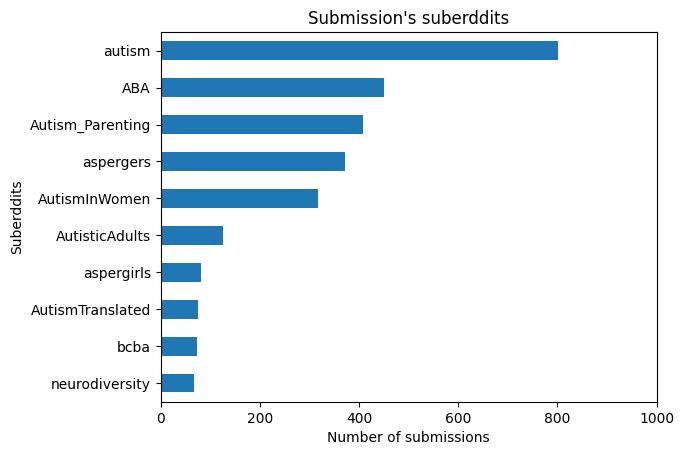

In [53]:
# sort in descending order and select the top 10 suberddits
filtered_suberddits_cleaned = suberddits.sort_values(by='count', ascending=False).head(10)

# plot the top suberddits ( where the submissions came from/ that provided the most submissions )
plt.figure(figsize=(6, 8))
ax = filtered_suberddits_cleaned.plot(kind='barh')
ax.set_xlim(0, 1000)
ax.get_legend().remove()

plt.xlabel('Number of submissions')
plt.ylabel('Suberddits')
plt.title('Submission\'s suberddits')

# show highest count at the top
plt.gca().invert_yaxis()
plt.show()


# almost half of the submission come from the 10 Reddit communities below
# a quarter coming form the r/autism, r/ABA, r/Autism_Parenting, r/aspergers and r/AutismInWomen

In [54]:
# for text analysis we are only intereste in the text columns : title and selftext
# merge title and selftext
submissions_cleaned['submission_text'] = submissions_cleaned['title'] + ' ' + submissions_cleaned['selftext']
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 27 to 10951
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            7317 non-null   object        
 1   score            7317 non-null   int64         
 2   comments         7317 non-null   object        
 3   id               7317 non-null   object        
 4   is_self          7317 non-null   bool          
 5   name             7317 non-null   object        
 6   num_comments     7317 non-null   int64         
 7   selftext         7317 non-null   object        
 8   subreddit        7317 non-null   object        
 9   upvote_ratio     7317 non-null   float64       
 10  datetime         7317 non-null   datetime64[ns]
 11  month            7317 non-null   int32         
 12  year             7317 non-null   int32         
 13  submission_text  7317 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), 

In [55]:
# drop columns : title, comments, selftext, is_self, name, upvote_ratio ( these are not needed in the text analysis nor for identification or data description )
columns_to_drop = ['title', 'comments', 'selftext', 'is_self', 'name', 'upvote_ratio']
submissions_cleaned = submissions_cleaned.drop(columns=columns_to_drop)
submissions_cleaned.head(3)

,score,id,num_comments,subreddit,datetime,month,year,submission_text
27,1,y3msw7,0,IIAHPTherapyCenter,2022-10-14 07:06:18,10,2022,Best Autism Treatment in India \n\n**Autism s...
46,1,ycgjwe,0,GetHiredinFlorida,2022-10-24 17:00:59,10,2022,"Jacksonville (North), Fl - Bcba - Board Certif..."
93,0,y2q46p,7,autism,2022-10-13 05:14:14,10,2022,High-functioning autistic people who work jobs...


In [56]:
# add a column 'post_type' 
# mark all entried in the dataset as 'submission', in order to identify the entry as submission
# this will help differentiate submission rows and comment rows if needed later ( the 2 dataset will be merged into one)
submissions_cleaned['post_type'] = 'submission'
submissions_cleaned.head()

,score,id,num_comments,subreddit,datetime,month,year,submission_text,post_type
27,1,y3msw7,0,IIAHPTherapyCenter,2022-10-14 07:06:18,10,2022,Best Autism Treatment in India \n\n**Autism s...,submission
46,1,ycgjwe,0,GetHiredinFlorida,2022-10-24 17:00:59,10,2022,"Jacksonville (North), Fl - Bcba - Board Certif...",submission
93,0,y2q46p,7,autism,2022-10-13 05:14:14,10,2022,High-functioning autistic people who work jobs...,submission
103,3,yeiia1,8,Charleston,2022-10-27 04:31:30,10,2022,Tutoring in Charleston area? This is shot in t...,submission
140,295,y5ptzb,109,fakedisordercringe,2022-10-16 19:41:45,10,2022,The normalisation of self-dx'ing and the accep...,submission


In [57]:
# the final data set includes 7317 rows and 8 columns ( 1 text, 1 idetification (id), and the rest will be used to describe the data )
# the actual text cleanin will be done to all entries after the comments will be added to the set
submissions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 27 to 10951
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   score            7317 non-null   int64         
 1   id               7317 non-null   object        
 2   num_comments     7317 non-null   int64         
 3   subreddit        7317 non-null   object        
 4   datetime         7317 non-null   datetime64[ns]
 5   month            7317 non-null   int32         
 6   year             7317 non-null   int32         
 7   submission_text  7317 non-null   object        
 8   post_type        7317 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 514.5+ KB



# Comments dataset

In [58]:
# load comments dataset
comments = pd.read_csv('data/aba_asd_subm_comments.csv', engine='python', on_bad_lines='warn')

In [59]:
# total number of rows = 611069

# missing data for columns:

    # comment_author  573359 non-null - this is identification info , not neccesarry for anlysis ; 
    # this column will be dropped

    # comment_body    611061 non-null
    # the comment is empty or is a link format ( not text )
    # these rows will be dropped as they can't be included in the text analysis

    # comment_replies 611067 non-null

    # comment_depth   611067 non-null 
    # - this referes to the type of comment: 
    # if 0 , then it is a top comment (= is a direct reply to the submission)
    # if it is 1 then it is a reply to a top comment ...and so on
    # this factor is not relevant to the analysis so it will be dropped ( we are interested only in what the comments says )

# see documentation for praw comment extraction: https://praw.readthedocs.io/en/stable/tutorials/comments.html
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611069 entries, 0 to 611068
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   main_submission_id    611069 non-null  object 
 1   comment_author        573359 non-null  object 
 2   comment_body          611061 non-null  object 
 3   comment_id            611068 non-null  object 
 4   comment_created_utc   611068 non-null  object 
 5   comment_score         611068 non-null  object 
 6   comment_parent_id     611068 non-null  object 
 7   comment_subreddit     611068 non-null  object 
 8   comment_permalink     611068 non-null  object 
 9   comment_is_submitter  611068 non-null  object 
 10  comment_replies       611067 non-null  object 
 11  comment_depth         611067 non-null  float64
dtypes: float64(1), object(11)
memory usage: 55.9+ MB


In [60]:
# the missing data appear as strangely extracted ... this might mean that the data was coruppted at extraction time???
comments[comments[['comment_depth']].isnull().any(axis=1)]


,main_submission_id,comment_author,comment_body,comment_id,comment_created_utc,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
552524,13potkg,TedTran2001,Sources: u/HereToTalkMovies2,None,None,None,None,None,None,None,None,NaN
552525,beside himself. Driving around downtown CONNE...,jlen464,1684922175.0,1,t3_13potkg,nba,/r/nba/comments/13potkg/espn_if_youre_reading_...,False,<praw.models.comment_forest.CommentForest obje...,0,None,NaN


In [61]:
# seems these 2 rows are missing data for the factor above
# these 2 rows will be dropped
comments[comments[['comment_replies']].isnull().any(axis=1)]

,main_submission_id,comment_author,comment_body,comment_id,comment_created_utc,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
552524,13potkg,TedTran2001,Sources: u/HereToTalkMovies2,None,None,None,None,None,None,None,None,NaN
552525,beside himself. Driving around downtown CONNE...,jlen464,1684922175.0,1,t3_13potkg,nba,/r/nba/comments/13potkg/espn_if_youre_reading_...,False,<praw.models.comment_forest.CommentForest obje...,0,None,NaN


In [62]:
# drop the 2 row that have missing data for comment_replies and comment_depth ( they are the same ones )
comments = comments.dropna(subset=['comment_replies'])
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611067 entries, 0 to 611068
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   main_submission_id    611067 non-null  object 
 1   comment_author        573357 non-null  object 
 2   comment_body          611059 non-null  object 
 3   comment_id            611067 non-null  object 
 4   comment_created_utc   611067 non-null  object 
 5   comment_score         611067 non-null  object 
 6   comment_parent_id     611067 non-null  object 
 7   comment_subreddit     611067 non-null  object 
 8   comment_permalink     611067 non-null  object 
 9   comment_is_submitter  611067 non-null  object 
 10  comment_replies       611067 non-null  object 
 11  comment_depth         611067 non-null  float64
dtypes: float64(1), object(11)
memory usage: 60.6+ MB


In [63]:
# how a comment body should look like - text format
comments['comment_body'][0]

'Sounds like a normal 2 yo. They get pretty picky at that age, and some do even earlier.'

In [64]:
# 8 comments have no text (might have been deleted)
# these rows will be dropped as there is not text to analyse 
comments[comments[['comment_body']].isnull().any(axis=1)]

,main_submission_id,comment_author,comment_body,comment_id,comment_created_utc,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
36531,15wayma,GelatoVerde,NaN,jx0f0xa,1692547303.0,1,t3_15wayma,shitposting,/r/shitposting/comments/15wayma/japanese_cogni...,False,<praw.models.comment_forest.CommentForest obje...,0.0
256539,z2qhnf,MrPhi,NaN,ixkar77,1669255257.0,1,t1_ixhlrt2,explainlikeimfive,/r/explainlikeimfive/comments/z2qhnf/eli5_what...,False,<praw.models.comment_forest.CommentForest obje...,1.0
392202,11ssq02,Designer-Seesaw1381,NaN,jcik3dg,1679018587.0,6,t3_11ssq02,australia,/r/australia/comments/11ssq02/is_anyone_else_w...,False,<praw.models.comment_forest.CommentForest obje...,0.0
392313,11ssq02,Designer-Seesaw1381,NaN,jcikkr2,1679018816.0,28,t1_jcg7uzd,australia,/r/australia/comments/11ssq02/is_anyone_else_w...,False,<praw.models.comment_forest.CommentForest obje...,1.0
442233,166ccvu,Everythingismeaning,NaN,jykzxbb,1693519765.0,1,t3_166ccvu,AITAH,/r/AITAH/comments/166ccvu/aita_for_firing_my_h...,False,<praw.models.comment_forest.CommentForest obje...,0.0
455791,15nz7yr,-ChristopherEdwardS-,NaN,jvpoxy1,1691750867.0,1,t3_15nz7yr,midjourney,/r/midjourney/comments/15nz7yr/high_school_cli...,False,<praw.models.comment_forest.CommentForest obje...,0.0
457766,15nz7yr,The_Demons_Slayer,NaN,jvs7byx,1691786729.0,1,t3_15nz7yr,midjourney,/r/midjourney/comments/15nz7yr/high_school_cli...,False,<praw.models.comment_forest.CommentForest obje...,0.0
592173,13fz18z,Ok_Hedgehog_8546,NaN,jjyfowl,1683947403.0,3,t3_13fz18z,h3h3productions,/r/h3h3productions/comments/13fz18z/would_you_...,False,<praw.models.comment_forest.CommentForest obje...,0.0


In [65]:
# drop the 8 rows that have missing data for comment_body - no text to analyse
comments = comments.dropna(subset=['comment_body'])
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   main_submission_id    611059 non-null  object 
 1   comment_author        573349 non-null  object 
 2   comment_body          611059 non-null  object 
 3   comment_id            611059 non-null  object 
 4   comment_created_utc   611059 non-null  object 
 5   comment_score         611059 non-null  object 
 6   comment_parent_id     611059 non-null  object 
 7   comment_subreddit     611059 non-null  object 
 8   comment_permalink     611059 non-null  object 
 9   comment_is_submitter  611059 non-null  object 
 10  comment_replies       611059 non-null  object 
 11  comment_depth         611059 non-null  float64
dtypes: float64(1), object(11)
memory usage: 60.6+ MB


In [66]:
# the author is not relevant for the text analysis (we only extraced this data to check if it can be used to analyse who makes the remarks- ex. a parent or a proffesional etc. ; however this is not infomative in this sense)
# this column will be dropped
comments[comments[['comment_author']].isnull().any(axis=1)].head(3)

,main_submission_id,comment_author,comment_body,comment_id,comment_created_utc,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth
17,10zwt6z,NaN,Far right riot including storming a hotel host...,j86l8r7,1676162773.0,23,t3_10zwt6z,ukpolitics,/r/ukpolitics/comments/10zwt6z/suella_braverma...,False,<praw.models.comment_forest.CommentForest obje...,0.0
20,10zwt6z,NaN,[removed],j85qsey,1676149070.0,5,t3_10zwt6z,ukpolitics,/r/ukpolitics/comments/10zwt6z/suella_braverma...,False,<praw.models.comment_forest.CommentForest obje...,0.0
21,10zwt6z,NaN,I condemn the appalling disorder in Suella Bra...,j88ain7,1676201747.0,0,t3_10zwt6z,ukpolitics,/r/ukpolitics/comments/10zwt6z/suella_braverma...,False,<praw.models.comment_forest.CommentForest obje...,0.0


In [67]:
# drop the author column as it is not relevant to the analysis ( it contains usernames of redditors )
# no more missing data
comments = comments.drop('comment_author', axis=1)
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   main_submission_id    611059 non-null  object 
 1   comment_body          611059 non-null  object 
 2   comment_id            611059 non-null  object 
 3   comment_created_utc   611059 non-null  object 
 4   comment_score         611059 non-null  object 
 5   comment_parent_id     611059 non-null  object 
 6   comment_subreddit     611059 non-null  object 
 7   comment_permalink     611059 non-null  object 
 8   comment_is_submitter  611059 non-null  object 
 9   comment_replies       611059 non-null  object 
 10  comment_depth         611059 non-null  float64
dtypes: float64(1), object(10)
memory usage: 55.9+ MB


In [68]:
# add a the column post_type and fill it with 'comment' for all rows to identify them a comments not submissions
comments['post_type'] = 'comment'
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   main_submission_id    611059 non-null  object 
 1   comment_body          611059 non-null  object 
 2   comment_id            611059 non-null  object 
 3   comment_created_utc   611059 non-null  object 
 4   comment_score         611059 non-null  object 
 5   comment_parent_id     611059 non-null  object 
 6   comment_subreddit     611059 non-null  object 
 7   comment_permalink     611059 non-null  object 
 8   comment_is_submitter  611059 non-null  object 
 9   comment_replies       611059 non-null  object 
 10  comment_depth         611059 non-null  float64
 11  post_type             611059 non-null  object 
dtypes: float64(1), object(11)
memory usage: 60.6+ MB


In [69]:
comments.head(3)

,main_submission_id,comment_body,comment_id,comment_created_utc,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth,post_type
0,13cma8e,Sounds like a normal 2 yo. They get pretty pic...,jjgdppo,1683630200.0,10,t3_13cma8e,Parenting,/r/Parenting/comments/13cma8e/behavior_issues_...,False,<praw.models.comment_forest.CommentForest obje...,0.0,comment
1,13cma8e,Lots of 2yos go through a really picky stage. ...,jjghuy9,1683632788.0,4,t3_13cma8e,Parenting,/r/Parenting/comments/13cma8e/behavior_issues_...,False,<praw.models.comment_forest.CommentForest obje...,0.0,comment
2,13cma8e,I wouldn't assume ASD based on picky eating. 2...,jjgmi2z,1683635370.0,5,t3_13cma8e,Parenting,/r/Parenting/comments/13cma8e/behavior_issues_...,False,<praw.models.comment_forest.CommentForest obje...,0.0,comment


In [70]:
# comment_created_utc appears as a string in the dataframe -> need to be turned into float
comments.comment_created_utc = comments.comment_created_utc.apply(float)
# create datetime column that contains the timestamps as datetime objects
comments['datetime'] = comments.comment_created_utc.apply(datetime.utcfromtimestamp)
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   main_submission_id    611059 non-null  object        
 1   comment_body          611059 non-null  object        
 2   comment_id            611059 non-null  object        
 3   comment_created_utc   611059 non-null  float64       
 4   comment_score         611059 non-null  object        
 5   comment_parent_id     611059 non-null  object        
 6   comment_subreddit     611059 non-null  object        
 7   comment_permalink     611059 non-null  object        
 8   comment_is_submitter  611059 non-null  object        
 9   comment_replies       611059 non-null  object        
 10  comment_depth         611059 non-null  float64       
 11  post_type             611059 non-null  object        
 12  datetime              611059 non-null  datetime64[ns]
dtypes: d

In [71]:
comments[['comment_created_utc', 'datetime']].head(3)

,comment_created_utc,datetime
0,1.683630e+09,2023-05-09 11:03:20
1,1.683633e+09,2023-05-09 11:46:28
2,1.683635e+09,2023-05-09 12:29:30


In [72]:
comments.head(3)

,main_submission_id,comment_body,comment_id,comment_created_utc,comment_score,comment_parent_id,comment_subreddit,comment_permalink,comment_is_submitter,comment_replies,comment_depth,post_type,datetime
0,13cma8e,Sounds like a normal 2 yo. They get pretty pic...,jjgdppo,1.683630e+09,10,t3_13cma8e,Parenting,/r/Parenting/comments/13cma8e/behavior_issues_...,False,<praw.models.comment_forest.CommentForest obje...,0.0,comment,2023-05-09 11:03:20
1,13cma8e,Lots of 2yos go through a really picky stage. ...,jjghuy9,1.683633e+09,4,t3_13cma8e,Parenting,/r/Parenting/comments/13cma8e/behavior_issues_...,False,<praw.models.comment_forest.CommentForest obje...,0.0,comment,2023-05-09 11:46:28
2,13cma8e,I wouldn't assume ASD based on picky eating. 2...,jjgmi2z,1.683635e+09,5,t3_13cma8e,Parenting,/r/Parenting/comments/13cma8e/behavior_issues_...,False,<praw.models.comment_forest.CommentForest obje...,0.0,comment,2023-05-09 12:29:30


In [73]:
# columns not relevat for the analysis (not text nor help describe the data nor identify it):
# comment_permalink, comment_is_submitter, comment_replies, comment_created_utc
# drop these columns
# the dataset now has 611059 rows and 9 columns
columns_to_drop = ['comment_permalink', 'comment_is_submitter', 'comment_replies', 'comment_created_utc']
comments = comments.drop(columns=columns_to_drop)
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   main_submission_id  611059 non-null  object        
 1   comment_body        611059 non-null  object        
 2   comment_id          611059 non-null  object        
 3   comment_score       611059 non-null  object        
 4   comment_parent_id   611059 non-null  object        
 5   comment_subreddit   611059 non-null  object        
 6   comment_depth       611059 non-null  float64       
 7   post_type           611059 non-null  object        
 8   datetime            611059 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 46.6+ MB


In [74]:
# commnet_score is an int -> change its type from object to int in the dataframe
comments['comment_score'] = comments['comment_score'].astype(int)
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   main_submission_id  611059 non-null  object        
 1   comment_body        611059 non-null  object        
 2   comment_id          611059 non-null  object        
 3   comment_score       611059 non-null  int64         
 4   comment_parent_id   611059 non-null  object        
 5   comment_subreddit   611059 non-null  object        
 6   comment_depth       611059 non-null  float64       
 7   post_type           611059 non-null  object        
 8   datetime            611059 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 46.6+ MB


In [75]:
# get descriptives for numerical values 
# note : comment_depth is an ordinal variable
comments.describe()

,comment_score,comment_depth,datetime
count,611059.000000,611059.000000,611059
mean,16.350588,1.660867,2023-05-19 16:35:37.902100992
min,-3274.000000,0.000000,2022-10-13 05:14:14
25%,1.000000,0.000000,2023-02-17 16:21:02.500000
50%,2.000000,1.000000,2023-06-04 18:25:44
75%,6.000000,3.000000,2023-08-23 17:40:01
max,43465.000000,9.000000,2023-10-23 15:10:07
std,217.169270,2.062313,NaN


In [76]:
# what are the most popular comments?
# sort in descending order by score and select the top 10 comments
top_comments = comments.sort_values(by='comment_score', ascending=False).head(10)
for index, row in top_comments.iterrows():
    text = row['comment_body']
    subreddit = row['comment_subreddit']
    score = row['comment_score']
    
    print('subreddit:', subreddit, ' | ', 'score:', score)
    print(text)
    print(20 * '-')

# same as with the top submissions, top comments do not seem to be related to ASD and ABA
# the dataset needs to be filtered forward to select more relevant posts to ABA and ASD - topic analysis?
# in this topic analysis all summissions and their comments will be included - in order to try and select all the posts about ABA and ASD (if this will be among topics)

subreddit: AmItheAsshole  |  score: 43465
OP states in the comments and main post that the drinks were just restocked and also that the OP was taking literally all of them. 

Doesn't matter if it's Gatorade, insulin, or toilet paper, hoarding all of the supply when you 1)clearly have enough for a while and 2) there is someone else in the store wanting to buy some makes you an asshole. The kid could be neurodivergent also, you don't know. And I guarantee you if you arrived and this mom did the same thing and took literally all of your special drink as soon as it was stocked you would be infuriated.

If you really can only do red and need to bulk order it, work with the store manager or order online. Often you can get up to a pallet for a lower price than on the shelves just by scheduling a special order.

YTA
--------------------
subreddit: AmItheAsshole  |  score: 38121
YTA. What exactly makes you think she would "ruin your special day"?  Simply the fact that she is autistic?!!
-------

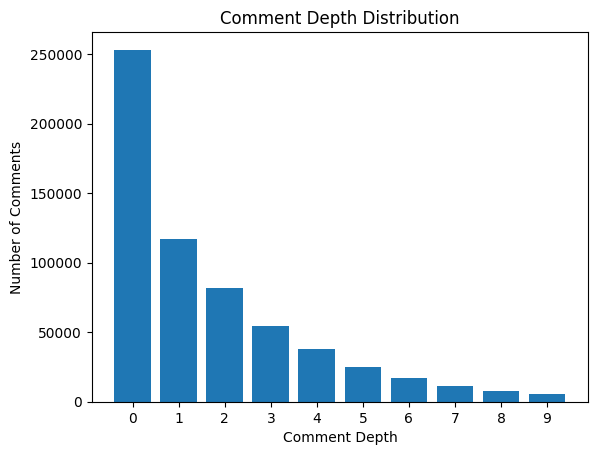

In [77]:
# comment_depth is an ordinal variable
# count the occurrences of each depth category and sort them by index
depth_counts = comments['comment_depth'].value_counts().sort_index()

# plot the depth counts
plt.bar(depth_counts.index, depth_counts)
plt.xticks(range(10))

plt.xlabel('Comment Depth')
plt.ylabel('Number of Comments')
plt.title('Comment Depth Distribution')

plt.show()

# as shown in the plot : most comments are level 0 = they are responses to the main submission
# almost half of these level 0 comments have comments comment responses of their own (level 1) and so on
# the maximum level (discussion depth/engagement) comments go the is level 9 

In [78]:
# Extract the month and year, and create new columns 'month' and 'year'
comments['month'] = comments['datetime'].dt.month
comments['year'] = comments['datetime'].dt.year
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 611059 entries, 0 to 611068
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   main_submission_id  611059 non-null  object        
 1   comment_body        611059 non-null  object        
 2   comment_id          611059 non-null  object        
 3   comment_score       611059 non-null  int64         
 4   comment_parent_id   611059 non-null  object        
 5   comment_subreddit   611059 non-null  object        
 6   comment_depth       611059 non-null  float64       
 7   post_type           611059 non-null  object        
 8   datetime            611059 non-null  datetime64[ns]
 9   month               611059 non-null  int32         
 10  year                611059 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 51.3+ MB


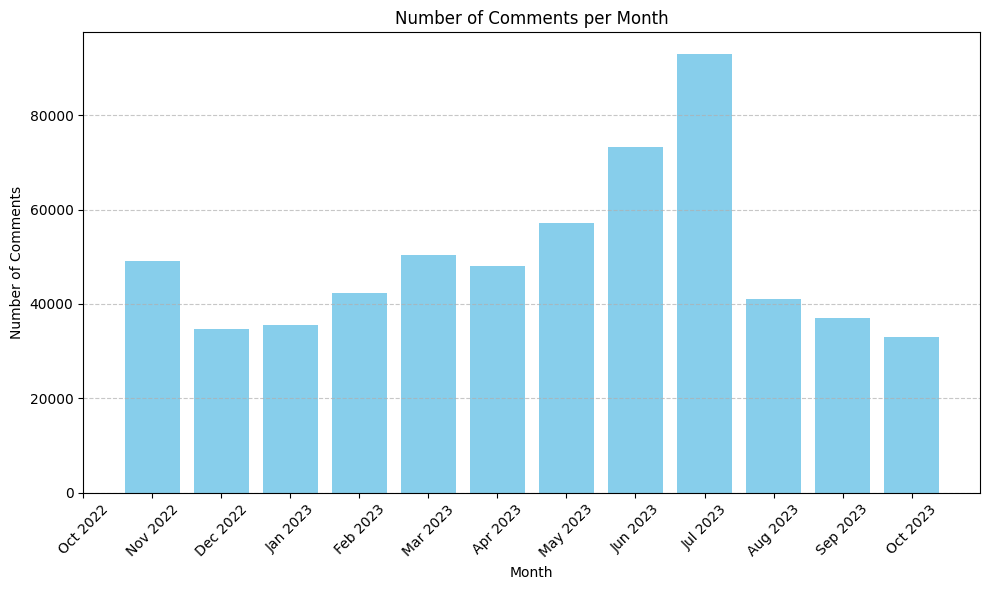

In [79]:
import calendar 

# sort data first by year (in ascending order) and then by month (in ascending order)
comments = comments.sort_values(['year', 'month'])
# group the data by 'year' and 'month' and count the number of 'id' values per month
counts = comments.groupby(['year', 'month'])['comment_id'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts['month'], counts['comment_id'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Month')

# format the x-axis labels to display both month and year
x_labels = [f'{calendar.month_abbr[month]} {year}' for year, month in zip(counts['year'], counts['month'])]

# get the unique x_labels and their corresponding positions ( chronological order )
unique_x_labels = list(set(x_labels))
unique_x_positions = [x_labels.index(label) for label in unique_x_labels]

plt.xticks(unique_x_positions, unique_x_labels, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# the time distribution of comments looks similar to that of the submissions
# this is to be expected as people react at the same time the submission was made 
# this engagement dies out as time passes, and new submissions are being posted ( people react to these new submissions instead of old ones)
# also Reddit default settings will show first the most recent submissions
# with time even very popilar submission are 'burried' at the bottom of the scroll page, and thus people don t see them and thus do not comment on them

In [80]:
# descriptive statistics for non numerical variables
comments.describe(include='object')

# there duplicate commnets ( comment_body has 29782 non-unique values)

,main_submission_id,comment_body,comment_id,comment_parent_id,comment_subreddit,post_type
count,611059,611059,611059,611059,611059,611059
unique,9083,581277,611059,242043,2194,1
top,10p4k1c,[deleted],is4ft9s,t3_15xbzp7,autism,comment
freq,14132,8316,1,6299,43967,611059


In [81]:
non_unique_selftext_mask = comments['comment_body'].duplicated(keep=False)
non_unique_selftext_rows = comments[non_unique_selftext_mask]
print(len(non_unique_selftext_rows))
non_unique_selftext_rows.head(10)

# we notice that most of the duplicate comments are missing text (have been deleted or removed )
# these will be dropped for the dataset as there is no text to analysie (for the purpose of this study)
# other duplicate comments seem to be short answers like 'No' or 'No problem' - these will be dropped as well as this type of text is not infromative about ABA and ASD

34087


,main_submission_id,comment_body,comment_id,comment_score,comment_parent_id,comment_subreddit,comment_depth,post_type,datetime,month,year
3062,y2q46p,No.,is4dsfh,1,t3_y2q46p,autism,0.0,comment,2022-10-13 05:34:27,10,2022
4214,y5ptzb,[deleted],ismoazz,14,t3_y5ptzb,fakedisordercringe,0.0,comment,2022-10-17 02:59:53,10,2022
4222,y5ptzb,[deleted],isndfhu,-1,t3_y5ptzb,fakedisordercringe,0.0,comment,2022-10-17 07:40:49,10,2022
4225,y5ptzb,[deleted],isla6sm,-26,t3_y5ptzb,fakedisordercringe,0.0,comment,2022-10-16 20:45:52,10,2022
4243,y5ptzb,[removed],isnh28z,7,t1_ismoazz,fakedisordercringe,1.0,comment,2022-10-17 08:35:03,10,2022
4263,y5ptzb,[deleted],isnv1em,4,t1_isnh28z,fakedisordercringe,2.0,comment,2022-10-17 11:40:08,10,2022
4266,y5ptzb,[deleted],islu742,-16,t1_islo6yj,fakedisordercringe,2.0,comment,2022-10-16 23:08:48,10,2022
4286,y5ptzb,[deleted],ismxwq8,-5,t1_ism5owj,fakedisordercringe,4.0,comment,2022-10-17 04:27:26,10,2022
4287,y5ptzb,[deleted],ismya7a,-2,t1_ism9itz,fakedisordercringe,4.0,comment,2022-10-17 04:31:17,10,2022
4288,y5ptzb,No problem 👍,isnn4bn,6,t1_isnmv2o,fakedisordercringe,5.0,comment,2022-10-17 10:04:11,10,2022


In [82]:
# remove all rows that have only the text [deleted] or [removed]	
comments = comments[~comments['comment_body'].isin(['[deleted]', '[removed]'])]
comments.info()

# the dataset now has 596990 rows  

<class 'pandas.core.frame.DataFrame'>
Index: 596990 entries, 3059 to 610562
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   main_submission_id  596990 non-null  object        
 1   comment_body        596990 non-null  object        
 2   comment_id          596990 non-null  object        
 3   comment_score       596990 non-null  int64         
 4   comment_parent_id   596990 non-null  object        
 5   comment_subreddit   596990 non-null  object        
 6   comment_depth       596990 non-null  float64       
 7   post_type           596990 non-null  object        
 8   datetime            596990 non-null  datetime64[ns]
 9   month               596990 non-null  int32         
 10  year                596990 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 50.1+ MB


In [83]:
# check comment duplicates again
comments.describe(include='object')
# there are still duplicate comments - the short words like 'no' or 'no problem'

,main_submission_id,comment_body,comment_id,comment_parent_id,comment_subreddit,post_type
count,596990,596990,596990,596990,596990,596990
unique,9083,581275,596990,236523,2194,1
top,10p4k1c,Yes,is4ft9s,t3_15xbzp7,autism,comment
freq,13925,491,1,6295,43381,596990


In [84]:
non_unique_selftext_mask = comments['comment_body'].duplicated(keep=False)
non_unique_selftext_rows = comments[non_unique_selftext_mask]
print(len(non_unique_selftext_rows))
non_unique_selftext_rows.head(10)

20018


,main_submission_id,comment_body,comment_id,comment_score,comment_parent_id,comment_subreddit,comment_depth,post_type,datetime,month,year
3062,y2q46p,No.,is4dsfh,1,t3_y2q46p,autism,0.0,comment,2022-10-13 05:34:27,10,2022
4288,y5ptzb,No problem 👍,isnn4bn,6,t1_isnmv2o,fakedisordercringe,5.0,comment,2022-10-17 10:04:11,10,2022
4384,y48270,Thank you!,isltxz5,1,t1_isleb22,Parenting,3.0,comment,2022-10-16 23:06:50,10,2022
4401,y48270,Thank you so much!,isf4hz9,1,t1_isf03sv,Parenting,5.0,comment,2022-10-15 14:30:56,10,2022
10822,y7c3yp,**Please read before commenting.**\n\nKeep in ...,istmcrn,1,t3_y7c3yp,COVID19,0.0,comment,2022-10-18 16:44:24,10,2022
15193,y44g5x,for anyone needing more info on ABA: \n https:...,iselns6,4,t3_y44g5x,slp,0.0,comment,2022-10-15 11:37:34,10,2022
28502,yg2col,LITERALLY,iu7alp3,3,t3_yg2col,AutismTranslated,0.0,comment,2022-10-29 02:28:39,10,2022
28536,yg2col,I agree with this.,iu75bzn,6,t1_iu6xgvl,AutismTranslated,3.0,comment,2022-10-29 01:44:49,10,2022
35842,y6tcoz,Thanks for the heads up!,isv89l0,1,t1_isupmf2,ABA,2.0,comment,2022-10-18 23:06:40,10,2022
36386,y6ajuw,i agree,isoigkq,66,t1_isohcm7,196,1.0,comment,2022-10-17 14:55:12,10,2022


In [85]:
# remove duplicate short comments - the very short ones will be removed later , before the model is fitted
comments = comments.drop_duplicates(subset='comment_body')
comments.describe(include='object')
# no more duplicate text comments

,main_submission_id,comment_body,comment_id,comment_parent_id,comment_subreddit,post_type
count,581275,581275,581275,581275,581275,581275
unique,8966,581275,581275,230217,2191,1
top,10p4k1c,I don’t think it works like that,is4ft9s,t3_15xbzp7,autism,comment
freq,13375,1,1,6234,42361,581275


In [86]:
# cleaned dataset contains 581275 rows and 11 columns
comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581275 entries, 3059 to 610562
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   main_submission_id  581275 non-null  object        
 1   comment_body        581275 non-null  object        
 2   comment_id          581275 non-null  object        
 3   comment_score       581275 non-null  int64         
 4   comment_parent_id   581275 non-null  object        
 5   comment_subreddit   581275 non-null  object        
 6   comment_depth       581275 non-null  float64       
 7   post_type           581275 non-null  object        
 8   datetime            581275 non-null  datetime64[ns]
 9   month               581275 non-null  int32         
 10  year                581275 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 48.8+ MB


In [87]:
# which subreddit do most comments come from?
subreddit_counts = comments.comment_subreddit.value_counts()
# comments come from 2191 subreddits
# this number is more that the submissions ( they come from 1742 subreddits ) because we removed the non-text and empty submissions but kept the comments associated with them
print(len(subreddit_counts))
subreddit_counts

2191


comment_subreddit
autism                 42361
AmItheAsshole          39791
AutismInWomen          19539
AskReddit              19138
aspergers              15216
                       ...  
sexualassault              1
MakeFriendsOver30          1
rcboats                    1
IBSResearch                1
VSDCFreeVideoEditor        1
Name: count, Length: 2191, dtype: int64

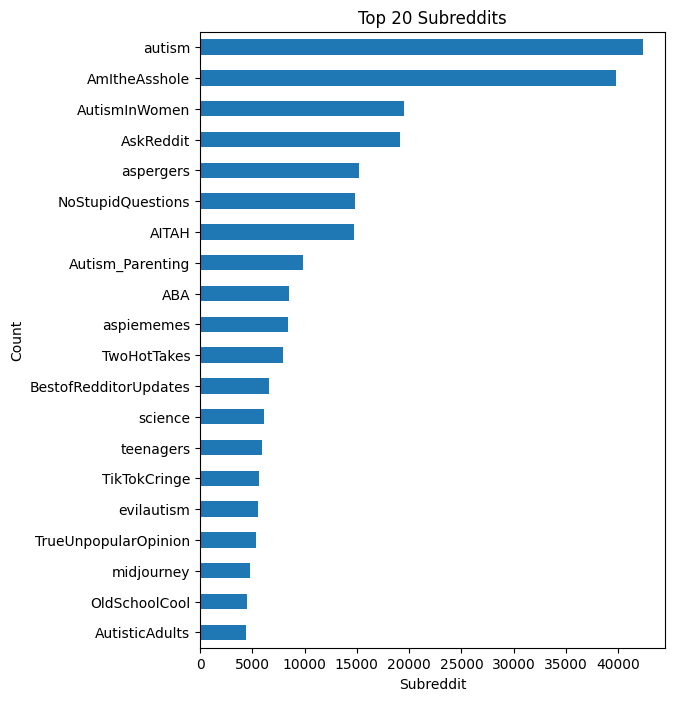

In [88]:
# plot the top 20 subreddits ( which have the most comments )
top_20_subreddits = subreddit_counts.head(20)

plt.figure(figsize=(6, 8))

ax = top_20_subreddits.plot(kind='barh')

plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.title('Top 20 Subreddits')

# show highest count at the top
plt.gca().invert_yaxis()
plt.show()

# some most of the comments, as it was the case for submissions, come from r/autism, r/AutismInWomen
# but r/aspergrs , r/ABA, or r/Autism_Parenting are lower on the list
# a very high number of comments come from general subreddits like r/AmItheAsshole or r/AsdReddit
# this is again an idicator that the posts need to be filtered forward to get relevant entries for ASD and ABA - topic analysis?


# Create the full dataset : meege submissions + comments

In [89]:
# get the info for both datasets in order to create same columns and concatenate the data
print('Submissions dataset:\n')
submissions_cleaned.info()
print('\n', 60 * '=')
print('\nComments dataset:\n')
comments.info()

Submissions dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 27 to 10951
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   score            7317 non-null   int64         
 1   id               7317 non-null   object        
 2   num_comments     7317 non-null   int64         
 3   subreddit        7317 non-null   object        
 4   datetime         7317 non-null   datetime64[ns]
 5   month            7317 non-null   int32         
 6   year             7317 non-null   int32         
 7   submission_text  7317 non-null   object        
 8   post_type        7317 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 514.5+ KB


Comments dataset:



<class 'pandas.core.frame.DataFrame'>
Index: 581275 entries, 3059 to 610562
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   main_submission_id  581275 non-null  object        
 1   comment_body        581275 non-null  object        
 2   comment_id          581275 non-null  object        
 3   comment_score       581275 non-null  int64         
 4   comment_parent_id   581275 non-null  object        
 5   comment_subreddit   581275 non-null  object        
 6   comment_depth       581275 non-null  float64       
 7   post_type           581275 non-null  object        
 8   datetime            581275 non-null  datetime64[ns]
 9   month               581275 non-null  int32         
 10  year                581275 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(6)
memory usage: 48.8+ MB


In [90]:
# rename columns in comments : 
# comment_score  = score, comment_subreddit = subreddit, comment_id = id, comment_body = text
comments_renamed = comments.rename(columns={
    'comment_score': 'score',
    'comment_subreddit': 'subreddit',
    'comment_id': 'id',
    'comment_body': 'text'
})

# rename columns in submissions_cleaned:
# submission_text = text
submissions_renamed = submissions_cleaned.rename(columns={
    'submission_text': 'text'
})

In [91]:
print('Submissions dataset:\n')
submissions_renamed.info()
print('\n', 60 * '=')
print('\nComments dataset:\n')
comments_renamed.info()

Submissions dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 27 to 10951
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   score         7317 non-null   int64         
 1   id            7317 non-null   object        
 2   num_comments  7317 non-null   int64         
 3   subreddit     7317 non-null   object        
 4   datetime      7317 non-null   datetime64[ns]
 5   month         7317 non-null   int32         
 6   year          7317 non-null   int32         
 7   text          7317 non-null   object        
 8   post_type     7317 non-null   object        
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 514.5+ KB


Comments dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 581275 entries, 3059 to 610562
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         


In [92]:
# columns needed for text analysis: text
# columns needed for identification: id, main_submission_id, comment_parent_id, datetime, month, year, post_type
submissions_new = submissions_renamed[['id', 'subreddit', 'post_type', 'text', 'datetime', 'month', 'year']]
comments_new = comments_renamed[['id', 'main_submission_id', 'comment_parent_id', 'subreddit', 'post_type', 'text', 'datetime', 'month', 'year']]

In [93]:
print('Submissions dataset:\n')
submissions_new.info()
print('\n', 60 * '=')
print('\nComments dataset:\n')
comments_new.info()

Submissions dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 7317 entries, 27 to 10951
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         7317 non-null   object        
 1   subreddit  7317 non-null   object        
 2   post_type  7317 non-null   object        
 3   text       7317 non-null   object        
 4   datetime   7317 non-null   datetime64[ns]
 5   month      7317 non-null   int32         
 6   year       7317 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 400.1+ KB


Comments dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 581275 entries, 3059 to 610562
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  581275 non-null  object        
 1   main_submission_id  581275 non-null  object        
 2   comment_parent_id  

In [94]:
# add the rows of the 2 datasets together
reddit_posts = pd.concat([comments_new, submissions_new], ignore_index=True)
reddit_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588592 entries, 0 to 588591
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  588592 non-null  object        
 1   main_submission_id  581275 non-null  object        
 2   comment_parent_id   581275 non-null  object        
 3   subreddit           588592 non-null  object        
 4   post_type           588592 non-null  object        
 5   text                588592 non-null  object        
 6   datetime            588592 non-null  datetime64[ns]
 7   month               588592 non-null  int32         
 8   year                588592 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 35.9+ MB


In [95]:
# the missing vlaues for the columns main_submission_id and comment_parent_id are not applicable to submissions
reddit_posts.tail(2)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year
588590,171wsr1,NaN,NaN,legaladvicecanada,submission,Why are video requirements for applications le...,2023-10-07 04:01:34,10,2023
588591,16x9icp,NaN,NaN,aspergers,submission,I just wish I could be normal I went to a spee...,2023-10-01 18:58:18,10,2023


In [96]:
# replace missing values for main_submission_id with 'main submission'
reddit_posts = reddit_posts.fillna('main submission')

# replace comment_parent_id with 'not comment'
reddit_posts = reddit_posts.fillna('not comment')

In [97]:
# the dataset contains 588592 rows and 9 cloumns
reddit_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588592 entries, 0 to 588591
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  588592 non-null  object        
 1   main_submission_id  588592 non-null  object        
 2   comment_parent_id   588592 non-null  object        
 3   subreddit           588592 non-null  object        
 4   post_type           588592 non-null  object        
 5   text                588592 non-null  object        
 6   datetime            588592 non-null  datetime64[ns]
 7   month               588592 non-null  int32         
 8   year                588592 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 35.9+ MB


In [98]:
# most data is non-numerical - except datetime variables  ( we already analysed/ visualise those )
reddit_posts.describe(include='object')

# all post have unique text

,id,main_submission_id,comment_parent_id,subreddit,post_type,text
count,588592,588592,588592,588592,588592,588592
unique,588592,8967,230218,2407,2,588592
top,is4ft9s,10p4k1c,main submission,autism,comment,I don’t think it works like that
freq,1,13375,7317,43163,581275,1


In [99]:
# which subreddit do most posts come from?
subreddit_counts = reddit_posts.subreddit.value_counts()
# posts come from 2407 subreddits
print(len(subreddit_counts))
subreddit_counts


2407


subreddit
autism             43163
AmItheAsshole      39856
AutismInWomen      19857
AskReddit          19138
aspergers          15587
                   ...  
PornPoisons            1
AthleticInsight        1
visualsnow             1
appliancerepair        1
dogmazine              1
Name: count, Length: 2407, dtype: int64

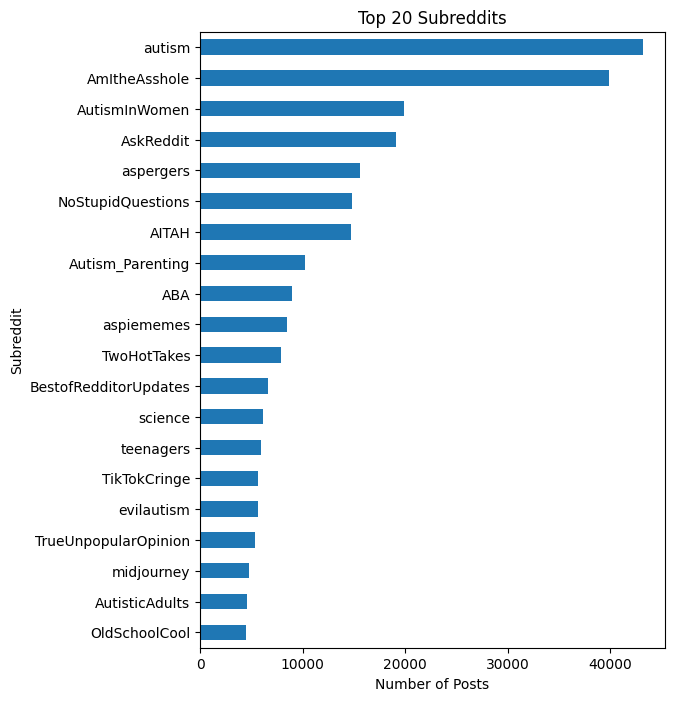

In [100]:
# plot the top 20 subreddits ( which have the most comments )
top_20_subreddits = subreddit_counts.head(20)

plt.figure(figsize=(6, 8))

ax = top_20_subreddits.plot(kind='barh')

plt.xlabel('Number of Posts')
plt.ylabel('Subreddit')
plt.title('Top 20 Subreddits')

# show highest count at the top
plt.gca().invert_yaxis()
plt.show()

# the distribution is very similar to the one for the comments 
# this is not suprising as there are many more comments than submissions 

In [101]:
%%capture
%pip freeze > requirements

# Clean the text data 
- remove non alpha characters 
- remove punctuation
- split camel case 
- remove extra spaces

*** though some practices recommend getting all the text to lowercase (Tunstall et al., 2022), sometimes the capitalization should be left if it is meaningfull. In this case we want to be able to differentiate between 'ABA' and 'aba' and 'ASD' and 'asd', for example as they can mean different things. Thus the casing will be left as it is in the original post.

Tunstall, L., von Werra, L., & Wolf, T. (2022). Natural Language Processing with Transformers, Revised Edition. Sebastopol, California, USA: O'Reilly Media.

In [102]:
# make a copy of the dataset just in case
posts = reddit_posts.copy()
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588592 entries, 0 to 588591
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  588592 non-null  object        
 1   main_submission_id  588592 non-null  object        
 2   comment_parent_id   588592 non-null  object        
 3   subreddit           588592 non-null  object        
 4   post_type           588592 non-null  object        
 5   text                588592 non-null  object        
 6   datetime            588592 non-null  datetime64[ns]
 7   month               588592 non-null  int32         
 8   year                588592 non-null  int32         
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 35.9+ MB


In [103]:
from text_cleanup_functions import split_words_by_space, remove_non_word_chars, replace_special_characters, remove_extra_white_spaces

# split any words that are linked together ( CammelCase or dashes )
posts['text'] = posts['text'].apply(split_words_by_space)

# remove all non alpha (remmoves numbers) characters and replace by space
posts['text'] = posts['text'].apply(remove_non_word_chars)

# replace characters like /r and \n and \r with space
posts['text'] = posts['text'].apply(replace_special_characters)

# remove extra spaces (leave only one as separator)
posts['text'] = posts['text'].apply(remove_extra_white_spaces)

# remove any extra spaces form the binign and end of the string
posts['text'] = posts['text'].str.strip()


In [104]:
import random
random.seed(7)
np.random.seed(7)

posts.text.sample(n=1).iloc[0]

'I m going to add that my own son is very bright and has autism I had the fight the district very hard but managed to finally get an IEP for him He was able to get speech services pragmatic which has helped him enormously when it came to learning how to interact with others Having a trained coteacher in his Gen Ed classes has helped enormously when there are occasional incidents related to his autism After five years he is moving to consultative services next year he is still retaining things such as extended time and small group testing for state tests which he needs Edit I m going to add that I had to force the issue with the district and fight very hard for the initial IEP because he gets high scores on state testing upper quartile but still did things like elope from class stimming often got overwhelmed and had trouble focusing when there were too many distractions in class'

In [105]:
# make a column containing the length of each post's text , in characters
posts['text_length']= posts['text'].str.len()
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588592 entries, 0 to 588591
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  588592 non-null  object        
 1   main_submission_id  588592 non-null  object        
 2   comment_parent_id   588592 non-null  object        
 3   subreddit           588592 non-null  object        
 4   post_type           588592 non-null  object        
 5   text                588592 non-null  object        
 6   datetime            588592 non-null  datetime64[ns]
 7   month               588592 non-null  int32         
 8   year                588592 non-null  int32         
 9   text_length         588592 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 40.4+ MB


In [106]:
# 64421 posts are less than 30 chars long
# these are mostly irrelevant comments 'No' , 'Just sent a pm Thank you', 'wdym' 
# as these kind of comments are not informative to the subject of interese (ABA & ASD) they rows will be dropped
posts_with_zero_length_text = posts[posts['text_length'] <= 30]
posts_with_zero_length_text

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length
3,is4dsfh,y2q46p,t3_y2q46p,autism,comment,No,2022-10-13 05:34:27,10,2022,2
4,is84zt0,y2q46p,t3_y2q46p,autism,comment,Um No,2022-10-14 00:10:29,10,2022,5
6,is70def,y2q46p,t1_is4gwqj,autism,comment,That s good for you,2022-10-13 19:30:35,10,2022,19
14,iu2qiyl,yeiia1,t1_itzeczp,Charleston,comment,Just sent a pm Thank you,2022-10-28 02:53:12,10,2022,24
54,isq3976,y5ptzb,t1_isp4nl8,fakedisordercringe,comment,t Ha Ts Ab Le Is T,2022-10-17 21:20:58,10,2022,18
...,...,...,...,...,...,...,...,...,...,...
581245,k4iqigv,175xx9g,t3_175xx9g,evilautism,comment,Neurospicy More like werespicy,2023-10-12 04:23:40,10,2023,30
581258,k4k1bbn,175xx9g,t3_175xx9g,evilautism,comment,i m born under a full moon too,2023-10-12 13:01:04,10,2023,30
581266,k4kgeab,175xx9g,t1_k4ixrka,evilautism,comment,Waning Gibbous sort of autism,2023-10-12 14:43:54,10,2023,29
581271,k4rn6ua,175xx9g,t1_k4pkc0r,evilautism,comment,wdym,2023-10-13 22:13:34,10,2023,4


In [107]:
# remove texts of 30 characters or less)
# 524171 rows in the final dataset
posts = posts[posts['text_length'] > 30]
posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523448 entries, 0 to 588591
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  523448 non-null  object        
 1   main_submission_id  523448 non-null  object        
 2   comment_parent_id   523448 non-null  object        
 3   subreddit           523448 non-null  object        
 4   post_type           523448 non-null  object        
 5   text                523448 non-null  object        
 6   datetime            523448 non-null  datetime64[ns]
 7   month               523448 non-null  int32         
 8   year                523448 non-null  int32         
 9   text_length         523448 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 39.9+ MB


In [108]:
%%capture
%pip install langdetect

In [109]:
# check language is english with langdetect
# see banchmarking here https://modelpredict.com/language-identification-survey
from langdetect import detect, detect_langs, DetectorFactory
random.seed(7)
np.random.seed(7)
DetectorFactory.seed = 7

posts['language'] = '0'
for index, row in posts.iterrows():
    try:
        # detect a single language per text
        lang = detect(row.text)
        posts.at[index, 'language'] = lang
      
    except Exception as e:
        print(row)
        print(e)
        pass

# one row has no text just numbers  - it will be removed - no longer the case ( all numbers removed with Regex)
# this is strange as we used regex to remove numbers but it didnt remove these numbers - maybe not numbers??? 
# i ran the code twice more and it removed the numbers... maybe ran it before i saved the changes? 

In [110]:
posts.sample(n=3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language
524967,jzb76q4,16avjff,t3_16avjff,AmItheAsshole,comment,You definitely are the AH here who are you to ...,2023-09-06 00:10:44,9,2023,384,en
461566,k0re9ba,16iscpv,t1_k0p9zx5,AITAH,comment,Lol I love how that s what you got from my rep...,2023-09-15 22:18:19,9,2023,178,en
101861,j591yvx,10h5x7n,t1_j56w9cp,IAmA,comment,You re polite to the dispatcher Believe it or ...,2023-01-21 06:55:42,1,2023,56,en


In [111]:
# which posts are not in english?
# langdetect identified 4621 posts as not being written in english 
# the post idetify as not english below seem to contain a couple of posts that are actually in english
# this is to be expected as the model will have errors
non_english_rows = posts[posts['language'] != 'en']
non_english_rows


,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language
312,ishha9t,y44g5x,t1_isey7ju,slp,comment,What ENT conferences do you go to,2022-10-16 00:47:55,10,2022,33,es
365,iuat7od,yg2col,t1_iu7tgp4,AutismTranslated,comment,So do narcissistic parents cause ASD,2022-10-29 22:12:48,10,2022,36,pt
490,isti1iz,y6tcoz,t3_y6tcoz,ABA,comment,https des az gov sites default files dl DDD A ...,2022-10-18 16:16:18,10,2022,54,ca
670,isofy72,y5smxa,t1_iso9io3,greentext,comment,I m into Captain Falcon Checkmate libertarians,2022-10-17 14:37:26,10,2022,46,it
1375,iu8l78s,yfzhoy,t1_iu7bozo,Fibromyalgia,comment,How did you get your pain under control,2022-10-29 12:08:41,10,2022,39,fr
...,...,...,...,...,...,...,...,...,...,...,...
587782,16c7n8b,main submission,main submission,buhaydigital,submission,I GOT HIRED BY THREE CLIENTS Kaya ko ba Hello ...,2023-09-07 05:43:01,9,2023,544,tl
587932,166xfvo,main submission,main submission,Nepal,submission,I was bullied everyday for years in the name o...,2023-09-01 04:41:17,9,2023,2555,id
588193,176smr0,main submission,main submission,AutistischLaagland,submission,Oproep Deelnemers gezocht voor onderzoek over ...,2023-10-13 06:54:51,10,2023,1300,nl
588312,16zdehm,main submission,main submission,OffMyChestPH,submission,Huling issue namin ng UMID noong pa Context Na...,2023-10-04 04:15:02,10,2023,629,tl


In [112]:
%%capture
%pip install fasttext

In [113]:
# check language of posts with fasttext
# https://fasttext.cc/docs/en/language-identification.html
import fasttext as ft

# Load the pretrained model
ft_model = ft.load_model("models/pretrained_fasttext/lid.176.bin")

def fasttext_language_predict(text, model = ft_model):
   
    prediction = model.predict([text])
    
    return prediction

In [114]:
random.seed(7)
np.random.seed(7)

posts['language_ft'] = '0'
for index, row in posts.iterrows():
    try:
        # detect language
        result = fasttext_language_predict(row.text)
        # fast text returns a fasttext object in the form of ([[__label__en]], [[0.9810618]])
        # we need to extract the 'en'/ language label from the result
        labeled_lang = result[0][0][0]
        lang = labeled_lang.replace('__label__', '')
        # save the post's language label in the dataframe
        posts.at[index, 'language_ft'] = lang
      
    except Exception as e:
        print(row)
        print(e)
        pass

In [115]:
posts.sample(n=3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
524967,jzb76q4,16avjff,t3_16avjff,AmItheAsshole,comment,You definitely are the AH here who are you to ...,2023-09-06 00:10:44,9,2023,384,en,en
461566,k0re9ba,16iscpv,t1_k0p9zx5,AITAH,comment,Lol I love how that s what you got from my rep...,2023-09-15 22:18:19,9,2023,178,en,en
101861,j591yvx,10h5x7n,t1_j56w9cp,IAmA,comment,You re polite to the dispatcher Believe it or ...,2023-01-21 06:55:42,1,2023,56,en,en


In [116]:
# which posts are not in english?
# fasttext detected 1318 posts as no being written in english ( much less than langdetect)
# as with langdetect, the fasttext model also lables some english posts as a different language
non_english_rows = posts[posts['language_ft'] != 'en']
non_english_rows

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
6879,islu9mn,y5khhp,t3_y5khhp,interestingasfuck,comment,N o admira que sejam l deres em muitas discipl...,2022-10-16 23:09:18,10,2022,153,pt,pt
7340,ism57s4,y5khhp,t1_isl3vnd,interestingasfuck,comment,THE MAN THE MYTH THE LEGEND SCOTT STERLING,2022-10-17 00:33:14,10,2022,42,vi,ja
9203,iudm203,yh4ugb,t3_yh4ugb,KidsAreFuckingStupid,comment,Vad har du gjort Ve ronica med dig sj lv Helge...,2022-10-30 15:09:30,10,2022,82,no,sv
9523,iudtq42,yh4ugb,t1_iudnr9o,KidsAreFuckingStupid,comment,Dang thought you met a real life lawnmower man,2022-10-30 16:03:13,10,2022,46,en,nl
9911,iujqkhq,yfsak4,t1_iu5okvf,AutismInWomen,comment,Salut N h site pas m envoyer un message si tu ...,2022-10-31 21:13:35,10,2022,57,fr,fr
...,...,...,...,...,...,...,...,...,...,...,...,...
586990,1646f4a,main submission,main submission,OffMyChestPH,submission,Ex at ex bff Shout out sa ex bff ko na may pa ...,2023-08-29 02:51:07,8,2023,387,tl,tl
587782,16c7n8b,main submission,main submission,buhaydigital,submission,I GOT HIRED BY THREE CLIENTS Kaya ko ba Hello ...,2023-09-07 05:43:01,9,2023,544,tl,tl
588193,176smr0,main submission,main submission,AutistischLaagland,submission,Oproep Deelnemers gezocht voor onderzoek over ...,2023-10-13 06:54:51,10,2023,1300,nl,nl
588312,16zdehm,main submission,main submission,OffMyChestPH,submission,Huling issue namin ng UMID noong pa Context Na...,2023-10-04 04:15:02,10,2023,629,tl,tl


In [117]:
# compare the 2 language cols and check the posts where the 2 models disagree 
different_languages_mask = posts['language'] != posts['language_ft']
# filter the rows that have different languages for language and language_ft columns
different_languages_rows = posts[different_languages_mask]
# the models disagree in 4105 of the cases 
different_languages_rows

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
312,ishha9t,y44g5x,t1_isey7ju,slp,comment,What ENT conferences do you go to,2022-10-16 00:47:55,10,2022,33,es,en
365,iuat7od,yg2col,t1_iu7tgp4,AutismTranslated,comment,So do narcissistic parents cause ASD,2022-10-29 22:12:48,10,2022,36,pt,en
490,isti1iz,y6tcoz,t3_y6tcoz,ABA,comment,https des az gov sites default files dl DDD A ...,2022-10-18 16:16:18,10,2022,54,ca,en
670,isofy72,y5smxa,t1_iso9io3,greentext,comment,I m into Captain Falcon Checkmate libertarians,2022-10-17 14:37:26,10,2022,46,it,en
1375,iu8l78s,yfzhoy,t1_iu7bozo,Fibromyalgia,comment,How did you get your pain under control,2022-10-29 12:08:41,10,2022,39,fr,en
...,...,...,...,...,...,...,...,...,...,...,...,...
584121,12kvkqj,main submission,main submission,MentalHealthPH,submission,CBT cognitive behavioral therapy Sino po may e...,2023-04-13 16:56:08,4,2023,215,tl,en
584431,13r7cz6,main submission,main submission,studentsph,submission,May naging friends na ba kayo or kakilala na g...,2023-05-25 04:03:26,5,2023,1885,tl,en
585029,146085m,main submission,main submission,FreeTextBook,submission,Looking for free pdf Behavior Analysis for Las...,2023-06-10 13:24:47,6,2023,120,en,it
586262,15omkt9,main submission,main submission,textbookrequest,submission,Request Behavior Analysis for Lasting Change I...,2023-08-11 22:17:19,8,2023,70,en,it


In [118]:
# which posts were identified by both model to not be english?
neither_english_mask = (posts['language'] != 'en') & (posts['language_ft'] != 'en')

# filter the rows where both model identifyed a different language than english
neither_english_rows = posts[neither_english_mask]
# 1063 rows/posts were labeled as a different language than english by both models
# by looking at the rows bellow, there all the post seem to be written in a different language than english
# there rows will be removed
neither_english_rows

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
6879,islu9mn,y5khhp,t3_y5khhp,interestingasfuck,comment,N o admira que sejam l deres em muitas discipl...,2022-10-16 23:09:18,10,2022,153,pt,pt
7340,ism57s4,y5khhp,t1_isl3vnd,interestingasfuck,comment,THE MAN THE MYTH THE LEGEND SCOTT STERLING,2022-10-17 00:33:14,10,2022,42,vi,ja
9203,iudm203,yh4ugb,t3_yh4ugb,KidsAreFuckingStupid,comment,Vad har du gjort Ve ronica med dig sj lv Helge...,2022-10-30 15:09:30,10,2022,82,no,sv
9911,iujqkhq,yfsak4,t1_iu5okvf,AutismInWomen,comment,Salut N h site pas m envoyer un message si tu ...,2022-10-31 21:13:35,10,2022,57,fr,fr
9915,iujqn27,yfsak4,t1_iu5xsj3,AutismInWomen,comment,WOW on est plusieurs Tu peux m crire en priv s...,2022-10-31 21:14:06,10,2022,61,fr,fr
...,...,...,...,...,...,...,...,...,...,...,...,...
586990,1646f4a,main submission,main submission,OffMyChestPH,submission,Ex at ex bff Shout out sa ex bff ko na may pa ...,2023-08-29 02:51:07,8,2023,387,tl,tl
587782,16c7n8b,main submission,main submission,buhaydigital,submission,I GOT HIRED BY THREE CLIENTS Kaya ko ba Hello ...,2023-09-07 05:43:01,9,2023,544,tl,tl
588193,176smr0,main submission,main submission,AutistischLaagland,submission,Oproep Deelnemers gezocht voor onderzoek over ...,2023-10-13 06:54:51,10,2023,1300,nl,nl
588312,16zdehm,main submission,main submission,OffMyChestPH,submission,Huling issue namin ng UMID noong pa Context Na...,2023-10-04 04:15:02,10,2023,629,tl,tl


In [119]:
# remove non-english rows ( as agreed by both langdetect and fasttext )

# boolean mask for rows where at least one of the columns is 'en'
english_mask = (posts['language'] == 'en') | (posts['language_ft'] == 'en')

# filter the posts dataframe and keep only the english rows
english_posts = posts[english_mask]
# 522385 posts to be included in the analysis
english_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522385 entries, 0 to 588591
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  522385 non-null  object        
 1   main_submission_id  522385 non-null  object        
 2   comment_parent_id   522385 non-null  object        
 3   subreddit           522385 non-null  object        
 4   post_type           522385 non-null  object        
 5   text                522385 non-null  object        
 6   datetime            522385 non-null  datetime64[ns]
 7   month               522385 non-null  int32         
 8   year                522385 non-null  int32         
 9   text_length         522385 non-null  int64         
 10  language            522385 non-null  object        
 11  language_ft         522385 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 47.8+ MB


In [120]:
# check the post containg only numbers was removed
english_posts[english_posts['id'] == 'jtbw6nv']

# the id does not exist , meand neither language detection models identified it as english

# this line is no longer needed as all the numbers were removed eith RegEx


,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft


In [121]:
# descriptive statistics for the text length
english_posts.text_length.describe()

# the posts length distribution is left skewed  
# most posts are short (nearly 3 quareter are blow the avergave length)

count    522385.000000
mean        314.851041
std         479.364975
min          31.000000
25%          83.000000
50%         171.000000
75%         365.000000
max       36944.000000
Name: text_length, dtype: float64

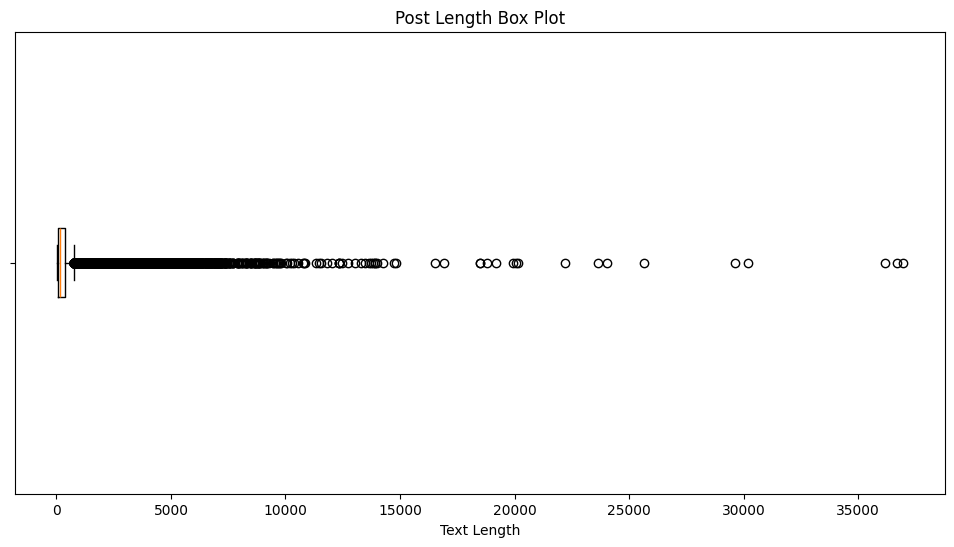

In [122]:
# Create a box plot for the 'text_length' column
plt.figure(figsize=(12, 6))
plt.boxplot(english_posts['text_length'], vert=False)
plt.xlabel('Text Length')
plt.yticks(plt.yticks()[0], plt.yticks()[0][1:])
plt.title('Post Length Box Plot')
plt.show()

In [123]:
# look at the top extremes
# 18 posts are very long - can be checked by human
very_long_posts = english_posts[english_posts['text_length'] > 15000]
print(len(very_long_posts))
for index, row in very_long_posts.iterrows():
    print(index)
    print(row.text)
    print('\n', 50 * '-', '\n')

# insex of post that are not about ASD and ABA: 
# 581339, 581766, 582446, 582501, 583514, 584149, 584656, 585134, 585182, 585523
# 585667, 585817, 586358, 586396, 586556, 587080
# these rows will be removed as they are not relevant to the topic of interest

# posts about ASD-ABA: 
# 582376 - negative
# 586995 - positive

18
581339
Comic Strips Conversion therapy via pantyhose sexy Nazis seduced by alien spies sexy spies seduced by Nazis the Oedipal twins from the Shining anti Japanese slurs and lots and lots of leg fetish You may currently be wondering Did u Equivalent Inflation have a stroke while writing that title No but Brooke Mc Eldowney creator of Nine Chickweed Lane CL certainly did when writing his comic The strip has been in publication since and has been a bizarre nightmare of fetishes for the entirety of those years We re going to go through some of the biggest controversies and weird shit involved in its publication including the big one that caused it to be dropped by most newspapers My solemn promise to you is this by the time you finish reading you ll understand every word of that title and you ll wish you didn t How it all began CL was started by Brooke Mc Eldowney in focusing on three generations of women in the Burber family It was a pretty standard four panel gag a day comic strip fe

In [124]:
# remove long posts with not relevant for the ABA-ASD topic
indices_to_remove = [581339, 581766, 582446, 582501, 583514, 584149, 584656, 585134, 585182, 585523, 585667, 585817, 586358, 586396, 586556, 587080]
english_posts = english_posts.drop(indices_to_remove)
english_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522369 entries, 0 to 588591
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  522369 non-null  object        
 1   main_submission_id  522369 non-null  object        
 2   comment_parent_id   522369 non-null  object        
 3   subreddit           522369 non-null  object        
 4   post_type           522369 non-null  object        
 5   text                522369 non-null  object        
 6   datetime            522369 non-null  datetime64[ns]
 7   month               522369 non-null  int32         
 8   year                522369 non-null  int32         
 9   text_length         522369 non-null  int64         
 10  language            522369 non-null  object        
 11  language_ft         522369 non-null  object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 47.8+ MB


In [125]:
# descriptive statistics for the text length (in char)
english_posts.text_length.describe()


count    522369.000000
mean        314.114712
std         458.874891
min          31.000000
25%          83.000000
50%         171.000000
75%         365.000000
max       24053.000000
Name: text_length, dtype: float64

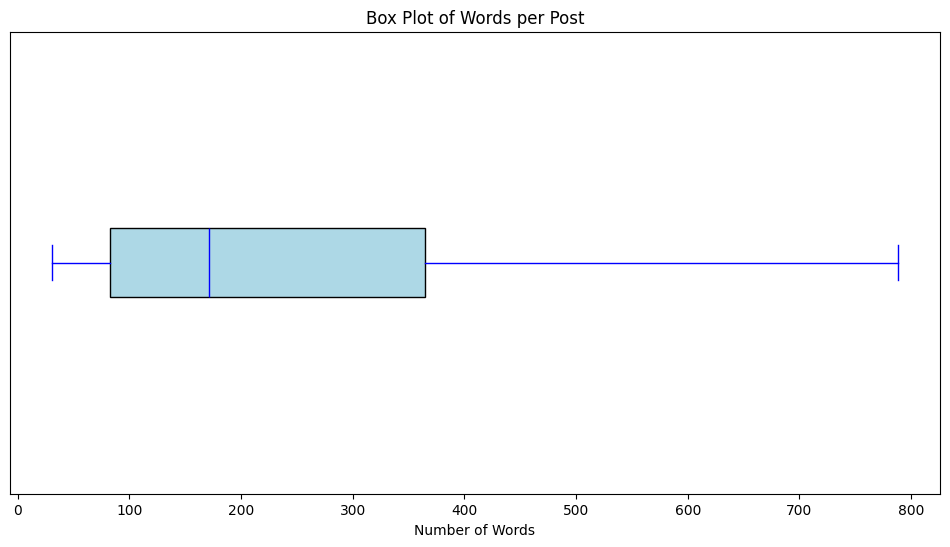

In [126]:
# Create a box plot for the 'text_length' column
plt.figure(figsize=(12, 6))
# dont show the outliers on the box plot
# all post with over 800 characters is considered an outlier
plt.boxplot(english_posts['text_length'], vert=False,  showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), capprops=dict(color="blue"),
            medianprops=dict(color="blue"), whiskerprops=dict(color="blue"))
plt.title("Box Plot of Words per Post")
plt.xlabel("Number of Words")
plt.yticks([])  

plt.show()

In [127]:
# how many 'words' per post?
# most transformer NLP models a maximum input sequence length that is referred to as the maximum context size of 512 tokens
# https://learning.oreilly.com/library/view/natural-language-processing/9781098136789/ch02.html#idm45146322557280
# texts that are longer than a model’s context size need to be truncated, which can lead to a loss in performance if the truncated text contains crucial information.
words_per_post = english_posts["text"].str.split().apply(len)


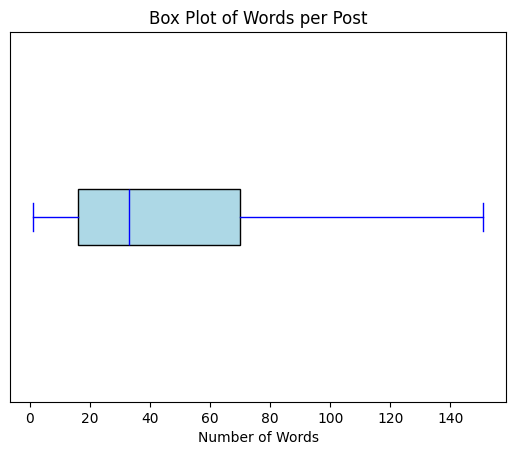

In [128]:
# most of the posts have a word count below 150 (in transformer models tokens are not words, but this can give a good estimate)
plt.boxplot(words_per_post, vert=False, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), capprops=dict(color="blue"),
            medianprops=dict(color="blue"), whiskerprops=dict(color="blue"))
plt.title("Box Plot of Words per Post")
plt.xlabel("Number of Words")
plt.yticks([])  
plt.show()

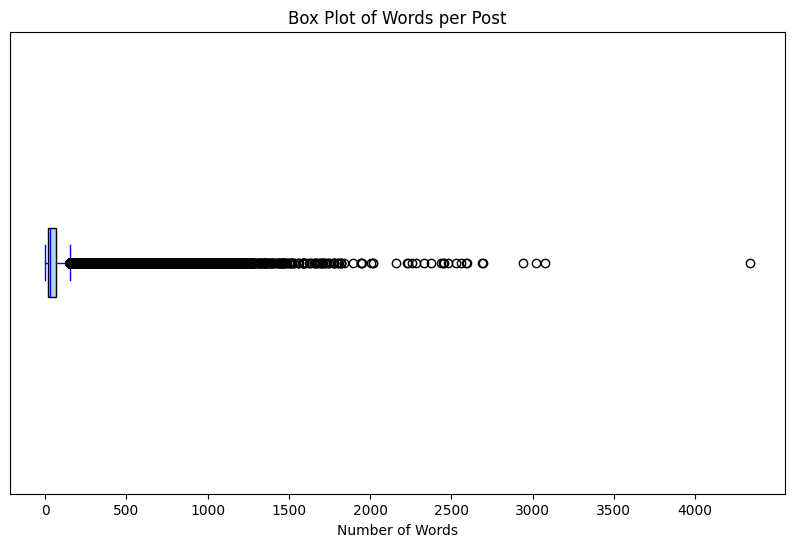

In [129]:
# plot the outliers - very long text
plt.figure(figsize=(10, 6)) 
plt.boxplot(words_per_post, vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), capprops=dict(color="blue"),
            medianprops=dict(color="blue"), whiskerprops=dict(color="blue"))
plt.title("Box Plot of Words per Post")
plt.xlabel("Number of Words")
plt.yticks([])  
plt.xticks(range(0, max(words_per_post) + 1, 500))
plt.show()

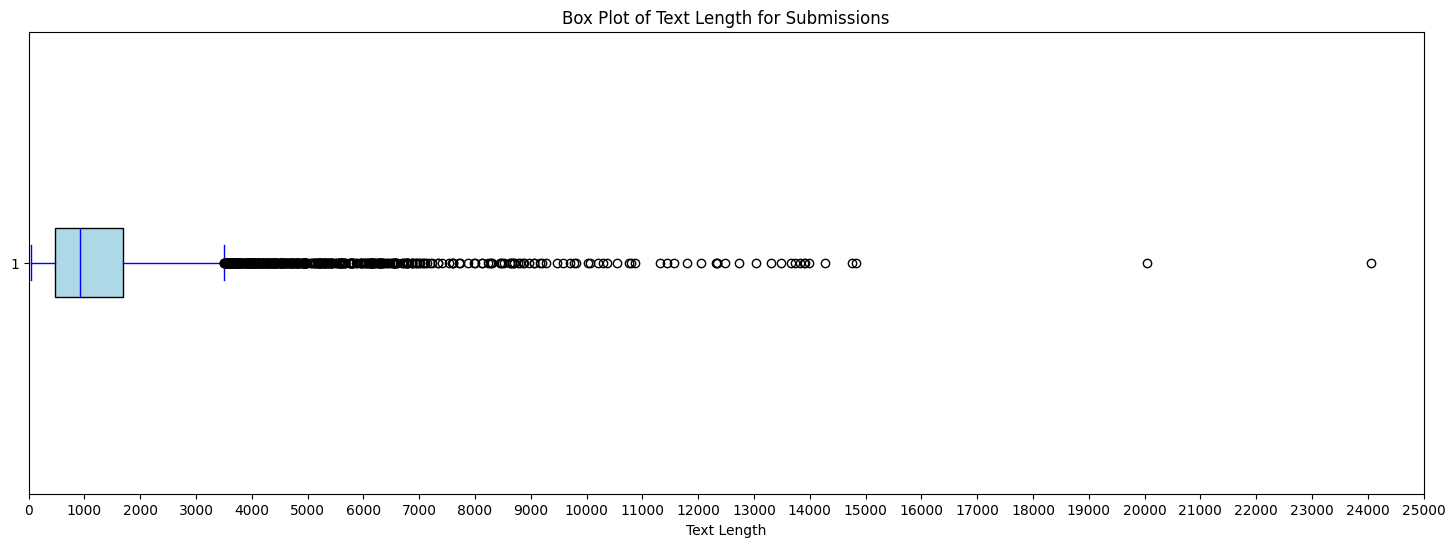

In [130]:
# which are the longer texts submissions or comments? do they differe?

# filter rows where 'type' is 'submission'
submissions_df = english_posts[english_posts['post_type'] == 'submission']

# create a box plot for the text length of submissions
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed
plt.boxplot(submissions_df['text_length'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), capprops=dict(color="blue"),
            medianprops=dict(color="blue"), whiskerprops=dict(color="blue"))
plt.title('Box Plot of Text Length for Submissions')
plt.xlabel('Text Length')
# set the x-axis scale from 0 to 25000
plt.xlim(0, 25000)
x_ticks = np.arange(0, 25001, 1000)
plt.xticks(x_ticks)
plt.show()


# most submissions are up to 3500 characterst long 
# the very long sumbmissions go to 15000 with 2 of them being over 20000 characters long

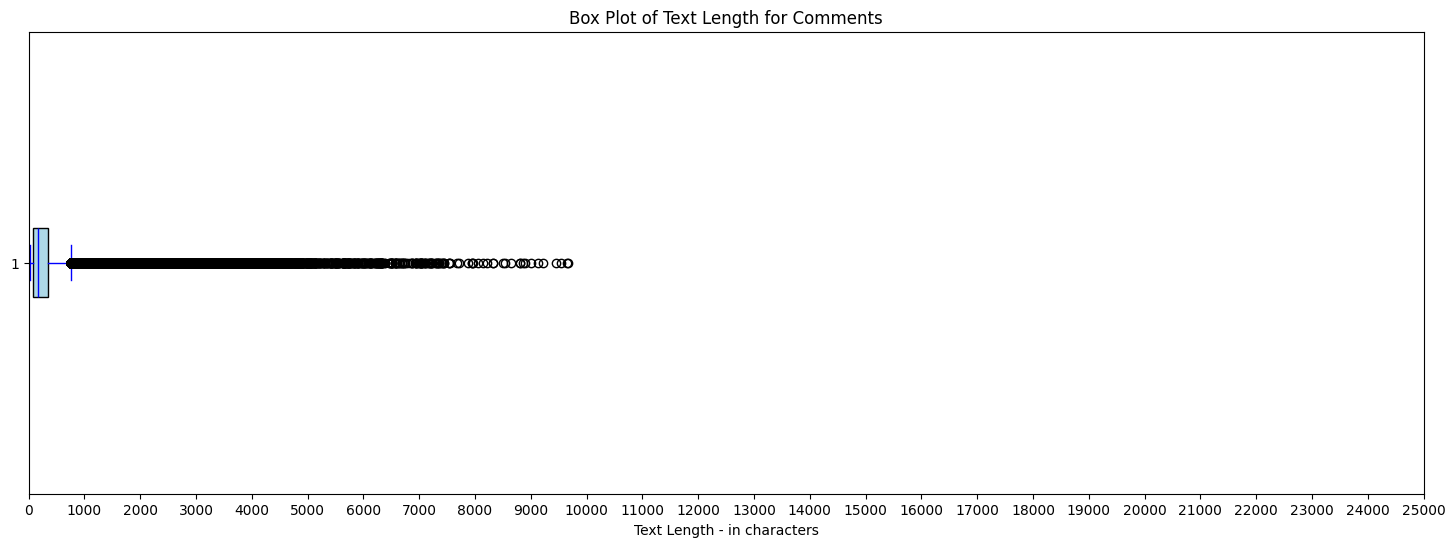

In [131]:
# filter rows where 'type' is 'comment'
comments_df = english_posts[english_posts['post_type'] == 'comment']

# create a box plot for the text length of comments
plt.figure(figsize=(18, 6))  
plt.boxplot(comments_df['text_length'], vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"), capprops=dict(color="blue"),
            medianprops=dict(color="blue"), whiskerprops=dict(color="blue"))
plt.title('Box Plot of Text Length for Comments')
plt.xlabel('Text Length - in characters')
# set the x-axis scale from 0 to 25000
plt.xlim(0, 25000)

x_ticks = np.arange(0, 25001, 1000)
plt.xticks(x_ticks)
plt.show()

# most comments are up to 1000 characters long 
# the very long comments go to 10000 characters long

# for the purpose of this analysis this is not important - we are only looking at people's opinions (pro or against ABA)
# howver we will need to make sure then when the data is split into training, validation and test sets we will keep the proportion of comments vs submissions the same in all 3 sets.
# also to note that the model might be leargning more form the submissions ( being longer they contain more information )

In [132]:
# save cleaned dataset 
file_path = 'data/english_posts_cleaned.csv'
english_posts.to_csv(file_path, index=False)


In [133]:
file_path = 'data/english_posts_cleaned.csv'
english_posts = pd.read_csv(file_path)
english_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522369 entries, 0 to 522368
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  522369 non-null  object
 1   main_submission_id  522369 non-null  object
 2   comment_parent_id   522369 non-null  object
 3   subreddit           522369 non-null  object
 4   post_type           522369 non-null  object
 5   text                522369 non-null  object
 6   datetime            522369 non-null  object
 7   month               522369 non-null  int64 
 8   year                522369 non-null  int64 
 9   text_length         522369 non-null  int64 
 10  language            522369 non-null  object
 11  language_ft         522369 non-null  object
dtypes: int64(3), object(9)
memory usage: 47.8+ MB


In [134]:
english_posts.head(3)

,id,main_submission_id,comment_parent_id,subreddit,post_type,text,datetime,month,year,text_length,language,language_ft
0,is4ft9s,y2q46p,t3_y2q46p,autism,comment,I don t think it works like that,2022-10-13 05:58:56,10,2022,32,en,en
1,is4gwqj,y2q46p,t3_y2q46p,autism,comment,I do we have handicap add on to our government...,2022-10-13 06:12:48,10,2022,189,en,en
2,is4c22w,y2q46p,t3_y2q46p,autism,comment,Hey u Starflarity thank you for your post at r...,2022-10-13 05:14:14,10,2022,458,en,en


In [135]:
# most transformer NLP model have a limit of how long of a text they can handle ( for ex roberta models take up to 512 tokens)
# get the posts that have over 150 words (considered outliers in this dataset):
very_long_posts = english_posts[english_posts['text_length'] > 15000]


# Wordcloud 

In [136]:
%%capture
%pip install wordcloud
%pip install Pillow

In [215]:
from wordcloud import WordCloud, STOPWORDS
import PIL.Image

# join the different processed posts together.
long_string = ' '.join(list(english_posts['text'].values))


In [216]:
# make a word cloud of the top 1000 most common words
wc = WordCloud( stopwords=STOPWORDS, max_words=1000, background_color="white")


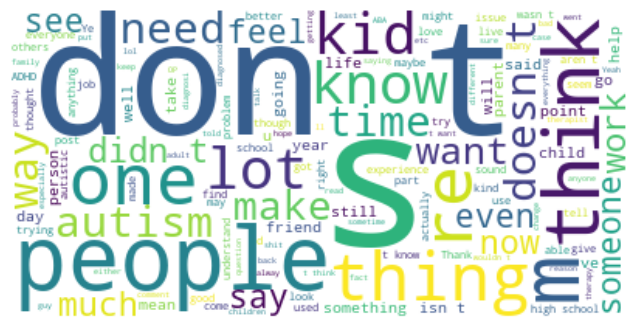

In [217]:
# generate and display the most frequent words in  the dataset
wc.generate(long_string)

plt.figure(figsize=(8, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# the word cloud is not very informative
# the default list of STOPWORDS does not capture the irrelevant words in the dataset -> this needs to be augmented
# we notice that a lot of the posts mention autism  and child/kid and parent 
# there is no ABA related vocabulary in the top 1000 words -> indicaticates that very few of the post might actually mention this therapy

In [218]:
# Extract the top 500 words from the WordCloud
top_words = list(wc.words_.keys())[:500]
# Store the top 100 words in a list
top_words_list = list(top_words)
top_words_list

# most top 100 words are general, common words, and do not contain a lot of information about the text

['s',
 'don t',
 'people',
 'm',
 'think',
 'one',
 're',
 'thing',
 'know',
 'lot',
 'kid',
 'autism',
 'way',
 'need',
 'time',
 'doesn t',
 'make',
 'want',
 'didn t',
 'work',
 'now',
 'say',
 'see',
 'feel',
 'even',
 'someone',
 'much',
 'something',
 'isn t',
 'life',
 'will',
 'well',
 'help',
 'u',
 'go',
 've',
 'parent',
 'said',
 'going',
 'mean',
 'still',
 'year',
 'take',
 'day',
 'child',
 'person',
 'friend',
 'point',
 'high school',
 'look',
 'find',
 'maybe',
 'good',
 'seem',
 'got',
 'd',
 'may',
 'experience',
 'ADHD',
 'able',
 'use',
 'everyone',
 'school',
 'made',
 'right',
 'might',
 't know',
 'love',
 'Thank',
 'better',
 'thought',
 'trying',
 'problem',
 'sound',
 'anything',
 'understand',
 'issue',
 'live',
 'though',
 'come',
 'try',
 'autistic',
 'actually',
 'others',
 'part',
 'kind',
 'give',
 'aren t',
 'used',
 'tell',
 'Ye',
 'job',
 'post',
 'wasn t',
 'many',
 'therapist',
 'reason',
 'talk',
 'diagnosi',
 'put',
 'Yeah',
 'anyone',
 'sometim

In [219]:
# AUGMENT THE STOPWORDS LIST = words to be ignored when generating the wordcloud

# get single letter and 2 letter words
# these are not relevant words 
irrelevant_words = [word for word in top_words_list if len(word) < 3]
irrelevant_words

['s',
 'm',
 're',
 'u',
 'go',
 've',
 'd',
 'Ye',
 'll',
 'OP',
 'Oh',
 'ex',
 'im',
 'ok',
 'bc',
 'NT']

In [220]:
# get negations
negation_words = [word for word in top_words_list if word.endswith(' t')]
negation_words

# these are not relevant words for a world cloud 
# they are relevant for topic and sentiment analysis

['don t',
 'doesn t',
 'didn t',
 'isn t',
 'aren t',
 'wasn t',
 'wouldn t',
 'won t',
 'couldn t',
 'haven t',
 'shouldn t',
 'weren t']

In [221]:
neg_from_words = [neg_word[:-2] for neg_word in negation_words ]
neg_from_words

['don',
 'doesn',
 'didn',
 'isn',
 'aren',
 'wasn',
 'wouldn',
 'won',
 'couldn',
 'haven',
 'shouldn',
 'weren']

In [222]:
# add the negation words to the irrelevant words list
irrelevant_words += negation_words
# add the neg form to the irrelevant words list
irrelevant_words += neg_from_words
irrelevant_words

['s',
 'm',
 're',
 'u',
 'go',
 've',
 'd',
 'Ye',
 'll',
 'OP',
 'Oh',
 'ex',
 'im',
 'ok',
 'bc',
 'NT',
 'don t',
 'doesn t',
 'didn t',
 'isn t',
 'aren t',
 'wasn t',
 'wouldn t',
 'won t',
 'couldn t',
 'haven t',
 'shouldn t',
 'weren t',
 'don',
 'doesn',
 'didn',
 'isn',
 'aren',
 'wasn',
 'wouldn',
 'won',
 'couldn',
 'haven',
 'shouldn',
 'weren']

In [223]:
# add the irelevant words to the STOPWORDS in wordcloud
stop_words = irrelevant_words + list(STOPWORDS)
stop_words

['s',
 'm',
 're',
 'u',
 'go',
 've',
 'd',
 'Ye',
 'll',
 'OP',
 'Oh',
 'ex',
 'im',
 'ok',
 'bc',
 'NT',
 'don t',
 'doesn t',
 'didn t',
 'isn t',
 'aren t',
 'wasn t',
 'wouldn t',
 'won t',
 'couldn t',
 'haven t',
 'shouldn t',
 'weren t',
 'don',
 'doesn',
 'didn',
 'isn',
 'aren',
 'wasn',
 'wouldn',
 'won',
 'couldn',
 'haven',
 'shouldn',
 'weren',
 'com',
 'not',
 'else',
 'under',
 'itself',
 'www',
 "how's",
 "let's",
 'were',
 'which',
 'could',
 'then',
 'since',
 'of',
 'once',
 'be',
 'about',
 "isn't",
 'that',
 "won't",
 'i',
 'too',
 'so',
 "when's",
 'also',
 "aren't",
 'had',
 "where's",
 'am',
 'up',
 'otherwise',
 'after',
 'her',
 'theirs',
 'if',
 "mustn't",
 'for',
 'this',
 "you've",
 "here's",
 'how',
 "wouldn't",
 'its',
 "shan't",
 'during',
 'hence',
 'any',
 'only',
 'their',
 "haven't",
 "we've",
 "i'm",
 'a',
 "hasn't",
 'like',
 'both',
 "i've",
 'been',
 "can't",
 'hers',
 'being',
 'is',
 'what',
 "what's",
 "i'd",
 "you're",
 "they'd",
 "they'll"

In [227]:
# add 't' to the list to be ignored
stop_words += ['t']

In [228]:
# make a word cloud of the top 1000 most common words 
# ignore the common, irrelevant words
wc_01= WordCloud(stopwords=stop_words, max_words=1000, background_color="white")

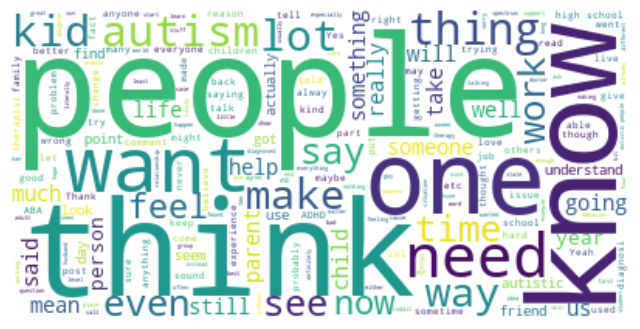

In [229]:
# generate and display the most frequent words in  the dataset
wc_01.generate(long_string)

plt.figure(figsize=(8, 8))
plt.imshow(wc_01, interpolation="bilinear")
plt.axis("off")
plt.show()


# the word cloud is not very informative ( but we have a bit more information than previously generated wordcloud)
# we notice that a lot of the posts mention autism  and child/kid and parent 
# the ABA term related vocabulary in the top 1000 words has very few mentions-> indicaticates that very few of the post might actually mention this therapy

In [230]:
# Extract the top 500 words from the WordCloud
top_words = list(wc_01.words_.keys())[:500]
# Store the top 100 words in a list
top_words_list = list(top_words)
top_words_list

['people',
 'think',
 'know',
 'one',
 'want',
 'need',
 'thing',
 'autism',
 'kid',
 'lot',
 'make',
 'way',
 'time',
 'work',
 'even',
 'say',
 'see',
 'feel',
 'now',
 'going',
 'someone',
 'something',
 'still',
 'much',
 'help',
 'mean',
 'will',
 'life',
 'well',
 'really',
 'said',
 'parent',
 'us',
 'take',
 'child',
 'person',
 'year',
 'understand',
 'autistic',
 'find',
 'friend',
 'look',
 'seem',
 'day',
 'actually',
 'got',
 'point',
 'use',
 'high school',
 'trying',
 'everyone',
 'maybe',
 'able',
 'made',
 'right',
 'good',
 'love',
 'school',
 'may',
 'ADHD',
 'experience',
 'sure',
 'give',
 'alway',
 'might',
 'come',
 'Thank',
 'sound',
 'probably',
 'live',
 'better',
 'thought',
 'tell',
 'try',
 'problem',
 'anything',
 'saying',
 'issue',
 'though',
 'talk',
 'kind',
 'others',
 'part',
 'used',
 'post',
 'job',
 'therapist',
 'put',
 'Yes',
 'diagnosi',
 'many',
 'back',
 'let',
 'never',
 'Yeah',
 'reason',
 'anyone',
 'change',
 'sometime',
 'family',
 'ABA'

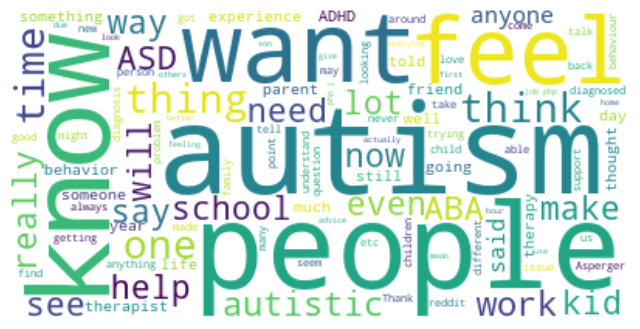

In [231]:
# wordcloud for submissions
# filter the dataset for 'submission' post_type
submission_texts = english_posts[english_posts['post_type'] == 'submission']['text']

# join the text of submissions together
long_string_submissions = ' '.join(submission_texts)

# generate and display the most frequent words in  the dataset
wc_01.generate(long_string_submissions)

plt.figure(figsize=(8, 8))
plt.imshow(wc_01, interpolation="bilinear")
plt.axis("off")
plt.show()

# autism and ASD is mentioned a lot in the submissions text
# we notice therapy and ABA also mentioned frequently in the submissions text

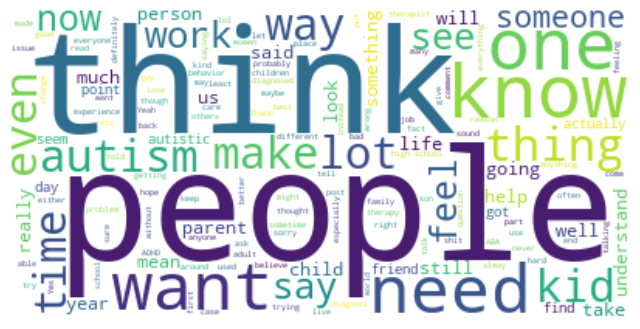

In [232]:
# wordcloud for comments
# filter the dataset for 'comment' post_type
commnents_texts = english_posts[english_posts['post_type'] == 'comment']['text']

# join the text of commnents together
long_string_commnents = ' '.join(commnents_texts)

# generate and display the most frequent words in  the dataset
wc_01.generate(long_string_commnents)

plt.figure(figsize=(8, 8))
plt.imshow(wc_01, interpolation="bilinear")
plt.axis("off")
plt.show()

# autism is mentioned a lot in the comments text
# we notice that the commnets texts contain more general common words , and seem to be more specific to autsim and not so much to ABA

The submission text seems to be more related to ABA and ASD . This is to be expected as the submissions were extracted using key words related to both ABA and ASD.

The comments seem be more general, and don't mention ABA much, though autism is mentioned frequently.

This analysis indicates the need for a topic analysis to further filter the ABA relevant posts ( most of the posts do seem to be about ASD , we need to further select those that are also related to ABA ). 

# Topic analysis 
unsupervised learning



